In [77]:
# set directory
#mydir<- getwd()
#setwd(mydir)

In [78]:
.libPaths(c("/home/x-tsuzuki/bigcare/Rlibs", .libPaths()))
library(corrplot)
library(data.table)
library(edgeR, verbose=FALSE)
library(GenomicRanges, verbose=FALSE)
library(pheatmap)
library(RColorBrewer)
library(statmod, verbose=FALSE)
library(EnsDb.Hsapiens.v86)
library(org.Hs.eg.db)
library(biomaRt)

In [79]:
so_counts <- read.table("./data/rna_count_matrix_single.txt", row.names=1, header=TRUE)
head(so_counts)
dim(so_counts)

,PDX4_CR1_Aligned.sortedByCoord.out.bam,PDX4_CR2_Aligned.sortedByCoord.out.bam,PDX4_CR3_Aligned.sortedByCoord.out.bam,PDX4_SE1_Aligned.sortedByCoord.out.bam,PDX4_SE2_Aligned.sortedByCoord.out.bam,PDX4_SE3_Aligned.sortedByCoord.out.bam
,<int>,<int>,<int>,<int>,<int>,<int>
5S_rRNA,2,3,1,3,1,3
5_8S_rRNA,62746,107982,76194,83512,63479,110892
7SK,61,103,137,253,244,124
A1BG,0,5,0,2,2,5
A1BG-AS1,27,34,40,58,52,52
A1CF,4,1,3,4,1,0


[1] 40330     6

In [80]:
htseq_count <- read.table(file = './htseq_all_single_count.tsv', sep = '\t', header = TRUE, row.names=1)
head(htseq_count)
dim(htseq_count)

,PDX4_CR1_single.tsv,PDX4_CR2_single.tsv,PDX4_CR3_single.tsv,PDX4_SE1_single.tsv,PDX4_SE2_single.tsv,PDX4_SE3_single.tsv
,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003,19,36,46,54,56,45
ENSG00000000005,0,0,0,0,0,0
ENSG00000000419,233,464,445,488,497,539
ENSG00000000457,55,125,121,118,115,127
ENSG00000000460,59,126,160,140,143,124
ENSG00000000938,0,0,0,0,0,0


[1] 62710     6

In [81]:
RSEM_count <- read.table(file = '/home/x-tsuzuki/bigcare/myproject/data/RSEM/norm/RSEM_Unnormalized_Counts.csv', sep = ',', header = TRUE, row.names=1)
head(RSEM_count)
dim(RSEM_count)

,PDX4_SE1,PDX4_SE2,PDX4_SE3,PDX4_CR1,PDX4_CR2,PDX4_CR3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003,45.00,56.00,42.00,18.00,33.00,43.00
ENSG00000000005,0.00,0.00,0.00,0.00,0.00,0.00
ENSG00000000419,461.58,461.00,517.00,221.00,456.60,425.99
ENSG00000000457,133.27,115.04,144.40,63.99,130.92,123.12
ENSG00000000460,140.85,134.15,112.09,56.07,111.18,141.91
ENSG00000000938,0.00,0.00,0.00,0.00,0.00,1.00


[1] 62710     6

In [161]:
mart <- useMart('ensembl', dataset = 'hsapiens_gene_ensembl')
ensemble2gene <- getBM(attributes=c("ensembl_transcript_id","external_gene_name","ensembl_gene_id"),
                       filters = "ensembl_transcript_id",
                       values = rownames(RSEM_count), 
                       mart = mart)
rownames(ensemble2gene) <- ensemble2gene$ensembl_transcript_id


Batch submitting query [=>-----------------------------]   8% eta:  4m

Batch submitting query [====>--------------------------]  15% eta:  4m

Batch submitting query [======>------------------------]  23% eta:  3m

Batch submitting query [=========>---------------------]  31% eta:  3m

Batch submitting query [===========>-------------------]  38% eta:  2m

Batch submitting query [=============>-----------------]  46% eta:  2m

Batch submitting query [================>--------------]  54% eta:  2m

Batch submitting query [==================>------------]  62% eta:  2m

Batch submitting query [====================>----------]  69% eta:  2m

Batch submitting query [=======================>-------]  77% eta:  1m

Batch submitting query [=========================>-----]  85% eta:  1m

Batch submitting query [============================>--]  92% eta: 31s
                                                                      



In [82]:
colnames(so_counts) <- substr(colnames(so_counts), 1, 8)
head(so_counts)

colnames(htseq_count) <- substr(colnames(htseq_count), 1, 8)
head(htseq_count)

#colnames(my_counts) <- substr(colnames(my_counts), 1, 8)
#head(my_counts)

,PDX4_CR1,PDX4_CR2,PDX4_CR3,PDX4_SE1,PDX4_SE2,PDX4_SE3
,<int>,<int>,<int>,<int>,<int>,<int>
5S_rRNA,2,3,1,3,1,3
5_8S_rRNA,62746,107982,76194,83512,63479,110892
7SK,61,103,137,253,244,124
A1BG,0,5,0,2,2,5
A1BG-AS1,27,34,40,58,52,52
A1CF,4,1,3,4,1,0


,PDX4_CR1,PDX4_CR2,PDX4_CR3,PDX4_SE1,PDX4_SE2,PDX4_SE3
,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003,19,36,46,54,56,45
ENSG00000000005,0,0,0,0,0,0
ENSG00000000419,233,464,445,488,497,539
ENSG00000000457,55,125,121,118,115,127
ENSG00000000460,59,126,160,140,143,124
ENSG00000000938,0,0,0,0,0,0


In [162]:
pdata <- read.delim("./pdata_single.txt", sep=",",comment.char="#", as.is=TRUE, header=TRUE)
pdata

run,source_name,treatment,replicate
<chr>,<chr>,<chr>,<int>
PDX4_SE1,PDX4,sensitive,1
PDX4_SE2,PDX4,sensitive,2
PDX4_SE3,PDX4,sensitive,3
PDX4_CR1,PDX4,resistant,1
PDX4_CR2,PDX4,resistant,2
PDX4_CR3,PDX4,resistant,3


All the information that we need for the current analysis is in two columns. And we need to get the subset of  our 8 samples from the whole set.

In [163]:
pdata <- pdata[,c("run", "treatment")]
pdata

run,treatment
<chr>,<chr>
PDX4_SE1,sensitive
PDX4_SE2,sensitive
PDX4_SE3,sensitive
PDX4_CR1,resistant
PDX4_CR2,resistant
PDX4_CR3,resistant


In [164]:
colnames(pdata) <- c("run", "treatment")

We need a column for **group** that we will use with **edgeR**.  We can make short descriptive group names based on the description column.  

In [165]:
my_groups <- pdata$treatment
my_groups

[1] "sensitive" "sensitive" "sensitive" "resistant" "resistant" "resistant"

In [166]:
pdata$group <- my_groups
pdata

run,treatment,group
<chr>,<chr>,<chr>
PDX4_SE1,sensitive,sensitive
PDX4_SE2,sensitive,sensitive
PDX4_SE3,sensitive,sensitive
PDX4_CR1,resistant,resistant
PDX4_CR2,resistant,resistant
PDX4_CR3,resistant,resistant


The variable group needs to be converted to a **factor** for **edgeR**.  

In [167]:
pdata$group <- as.factor(pdata$group)
table(pdata$group)


resistant sensitive 
        3         3 

Confirm that "BPH" control is set as the reference level, i.e. control.  **The reference level is always listed first.** In this case, we reorder the levels so BPH was set as the reference level.  

In [168]:
pdata$group <- factor(pdata$group, levels=c("sensitive", "resistant"))
levels(pdata$group)
pdata <- pdata[order(pdata$group),]
pdata

[1] "sensitive" "resistant"

,run,treatment,group
,<chr>,<chr>,<fct>
1,PDX4_SE1,sensitive,sensitive
2,PDX4_SE2,sensitive,sensitive
3,PDX4_SE3,sensitive,sensitive
4,PDX4_CR1,resistant,resistant
5,PDX4_CR2,resistant,resistant
6,PDX4_CR3,resistant,resistant


A descriptive label for the individual samples in each group will be useful for plots and processed datasets.

In [169]:
pdata$sample.label <- paste(pdata$group, 1:3, sep=".")
pdata<-pdata[order(pdata$group),]
pdata

,run,treatment,group,sample.label
,<chr>,<chr>,<fct>,<chr>
1,PDX4_SE1,sensitive,sensitive,sensitive.1
2,PDX4_SE2,sensitive,sensitive,sensitive.2
3,PDX4_SE3,sensitive,sensitive,sensitive.3
4,PDX4_CR1,resistant,resistant,resistant.1
5,PDX4_CR2,resistant,resistant,resistant.2
6,PDX4_CR3,resistant,resistant,resistant.3


Now, we are ready to send the data to **edgeR**.  The basic object class for edgeR is a **DGEList**.  You need a gene count matrix and group assignments.

# edgeR

## Making the DGEList
Now we are ready to start the **edgeR** analysis.  The first step is to format the count data and phenodata as a **DGEList** object. 

In [170]:
# first, reorder counts matrix to match with phenodata
#so_counts<-so_counts[,pdata$run]
#head(so_counts)

#htseq_count<-htseq_count[,pdata$run]
#head(htseq_count)

RSEM_count<-RSEM_count[,pdata$run]
head(RSEM_count)

,PDX4_SE1,PDX4_SE2,PDX4_SE3,PDX4_CR1,PDX4_CR2,PDX4_CR3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003,45.00,56.00,42.00,18.00,33.00,43.00
ENSG00000000005,0.00,0.00,0.00,0.00,0.00,0.00
ENSG00000000419,461.58,461.00,517.00,221.00,456.60,425.99
ENSG00000000457,133.27,115.04,144.40,63.99,130.92,123.12
ENSG00000000460,140.85,134.15,112.09,56.07,111.18,141.91
ENSG00000000938,0.00,0.00,0.00,0.00,0.00,1.00


In [171]:
## make DGE object
#my_dge_so <- DGEList(counts = so_counts, group = pdata$group)
#my_dge_so$samples$sample.label <- pdata$sample.label
#head(my_dge_so)

#my_dge_htseq <- DGEList(counts = htseq_count, group = pdata$group)
#my_dge_htseq$samples$sample.label <- pdata$sample.label
#head(my_dge_htseq)

my_dge_rsem <- DGEList(counts = RSEM_count, group = pdata$group)
my_dge_rsem$samples$sample.label <- pdata$sample.label
head(my_dge_rsem)

An object of class "DGEList"
$counts
                PDX4_SE1 PDX4_SE2 PDX4_SE3 PDX4_CR1 PDX4_CR2 PDX4_CR3
ENSG00000000003    45.00    56.00    42.00    18.00    33.00    43.00
ENSG00000000005     0.00     0.00     0.00     0.00     0.00     0.00
ENSG00000000419   461.58   461.00   517.00   221.00   456.60   425.99
ENSG00000000457   133.27   115.04   144.40    63.99   130.92   123.12
ENSG00000000460   140.85   134.15   112.09    56.07   111.18   141.91
ENSG00000000938     0.00     0.00     0.00     0.00     0.00     1.00

$samples
             group lib.size norm.factors sample.label
PDX4_SE1 sensitive 11617671            1  sensitive.1
PDX4_SE2 sensitive 11346415            1  sensitive.2
PDX4_SE3 sensitive 10977760            1  sensitive.3
PDX4_CR1 resistant  5526803            1  resistant.1
PDX4_CR2 resistant 10484824            1  resistant.2
PDX4_CR3 resistant 10887315            1  resistant.3

## Filtering the Data

We need to remove genes that are not expressed at a certain threshold.  Where you set this threshold is a matter of debate.  Certainly genes with no counts in any sample should be removed.

In [172]:
#all_zeroes_so <- apply(my_dge_so$counts, 1, sum) == 0
#table(all_zeroes_so)

#all_zeroes_htseq <- apply(my_dge_htseq$counts, 1, sum) == 0
#table(all_zeroes_htseq)

all_zeroes_rsem <- apply(my_dge_rsem$counts, 1, sum) == 0
table(all_zeroes_rsem)

all_zeroes_rsem
FALSE  TRUE 
39271 23439 

This shows that there are 14,729 genes that do not appear to be expressed in any sample.  If you wanted to be very conservative, this would be an acceptable filter, i.e. simply drop all the genes with no counts.  Generally, a less conservative strategy is recommended that takes into account the library size.  To do this, we need to convert the raw counts to Counts Per Million (cpm).  There is an **edgeR** function for this.   

In [173]:
#my_cpm_so <- cpm(my_dge_so, normalized.lib.size=FALSE, log=FALSE)
#head(my_cpm_so)

#my_cpm_htseq <- cpm(my_dge_htseq, normalized.lib.size=FALSE, log=FALSE)
#head(my_cpm_htseq)

my_cpm_rsem <- cpm(my_dge_rsem, normalized.lib.size=FALSE, log=FALSE)
head(my_cpm_rsem)

,PDX4_SE1,PDX4_SE2,PDX4_SE3,PDX4_CR1,PDX4_CR2,PDX4_CR3
ENSG00000000003,3.87341,4.935479,3.825917,3.256856,3.147406,3.94955062
ENSG00000000005,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000000
ENSG00000000419,39.73085,40.629572,47.095218,39.986953,43.548656,39.12718760
ENSG00000000457,11.47132,10.138885,13.153868,11.578123,12.486619,11.30857376
ENSG00000000460,12.12377,11.823117,10.210644,10.145106,10.603897,13.03443553
ENSG00000000938,0.00000,0.000000,0.000000,0.000000,0.000000,0.09185001


There is still the question of what CPM threshold to use for expression.  I have seen values from 0.1 to 10 used.  I think that both are extreme, and I typically use 1.  With that, we can convert the CPM matrix to a **logical** matrix that shows whether the CPM is greater than 1 or not.

In [174]:
#expressed_so <- apply(my_cpm_so, 2, function(x)(x >= 1))
#expressed_so[1:10, ]
                   
#expressed_htseq <- apply(my_cpm_htseq, 2, function(x)(x >= 1))
#expressed_htseq[1:10, ]
                
expressed_rsem <- apply(my_cpm_rsem, 2, function(x)(x >= 1))
expressed_rsem[1:10, ]

,PDX4_SE1,PDX4_SE2,PDX4_SE3,PDX4_CR1,PDX4_CR2,PDX4_CR3
ENSG00000000003,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
ENSG00000000005,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
ENSG00000000419,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
ENSG00000000457,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
ENSG00000000460,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
ENSG00000000938,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
ENSG00000000971,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
ENSG00000001036,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
ENSG00000001084,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
ENSG00000001167,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


Again, we have another cutoff choice.  Does a gene need to be expressed in only one sample or multiple samples to be retained?  We could use the logic that a gene might be expressed under only one biological condition (group).  Therefore, we set the cutoff to 2, i.e. the number of biological replicates in each group.

In [175]:
#keep_so <- apply(expressed_so, 1, sum) >= 2
#table(keep_so)

#keep_htseq <- apply(expressed_htseq, 1, sum) >= 2
#table(keep_htseq)

keep_rsem <- apply(expressed_rsem, 1, sum) >= 2
table(keep_rsem)

keep_rsem
FALSE  TRUE 
46225 16485 

So, we are going to discard about half of our features due to low or no expression.  Note, some packages such as **DESeq2** optimize this parameter for you.  

Now, we can recreate the **DGEList**, filtering the count matrix to remove unexpressed genes.

In [176]:
#my_dge_so <- DGEList(counts = so_counts[keep_so, ], group = pdata$group)
#my_dge_so$samples$sample.label <- pdata$sample.label
#my_dge_so <- calcNormFactors(my_dge_so, method="TMM")
#my_dge_so

#my_dge_htseq <- DGEList(counts = htseq_count[keep_htseq, ], group = pdata$group)
##my_dge_htseq$samples$sample.label <- pdata$sample.label
#my_dge_htseq <- calcNormFactors(my_dge_htseq, method="TMM")
#my_dge_htseq

my_dge_rsem <- DGEList(counts = RSEM_count[keep_rsem, ], group = pdata$group)
my_dge_rsem$samples$sample.label <- pdata$sample.label
my_dge_rsem <- calcNormFactors(my_dge_rsem, method="TMM")
my_dge_rsem

,PDX4_SE1,PDX4_SE2,PDX4_SE3,PDX4_CR1,PDX4_CR2,PDX4_CR3
ENSG00000000003,45.00,56.00,42.00,18.00,33.00,43.00
ENSG00000000419,461.58,461.00,517.00,221.00,456.60,425.99
ENSG00000000457,133.27,115.04,144.40,63.99,130.92,123.12
ENSG00000000460,140.85,134.15,112.09,56.07,111.18,141.91
ENSG00000000971,9908.12,9379.59,9357.02,5243.00,10238.48,9830.08
ENSG00000001084,170.82,186.89,199.82,1674.39,3445.03,3550.33
ENSG00000001167,487.61,505.75,513.40,230.77,488.38,524.43
ENSG00000001460,107.06,87.07,87.35,50.03,86.02,89.03
ENSG00000001461,271.68,215.93,195.98,97.97,168.98,173.97
ENSG00000001497,667.00,695.00,582.00,356.63,717.00,755.00


## Normalizing the Libraries

A **HUGE** issue with any NGS experiment is normalization.  Rarely do you get back the same number of reads for each library.  If you do, often you will get different alignment efficiencies that will affect the gene count matrix.

This is one parameter that I typically leave the defaults.  The TMM method can account for over-representation of specific genes in one library over another.  For example, if rRNA is abundant in a particular sample, not only will the rRNA levels be high, but other genes may be under-sequenced because the rRNA sequences consumed the sequencing resource.  For more information, see [Robinson and Oshlack](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2864565/).

**edgeR** does provide alternative normalization methods.  In addition, it is possible to normalize your count matrix with other software before you convert it to a **DGEList**.  

In [177]:
#my_dge_so <- calcNormFactors(my_dge_so, method="TMM")
#my_dge_so

#my_dge_htseq <- calcNormFactors(my_dge_htseq, method="TMM")
#my_dge_htseq

my_dge_rsem <- calcNormFactors(my_dge_rsem, method="TMM")
my_dge_rsem

,PDX4_SE1,PDX4_SE2,PDX4_SE3,PDX4_CR1,PDX4_CR2,PDX4_CR3
ENSG00000000003,45.00,56.00,42.00,18.00,33.00,43.00
ENSG00000000419,461.58,461.00,517.00,221.00,456.60,425.99
ENSG00000000457,133.27,115.04,144.40,63.99,130.92,123.12
ENSG00000000460,140.85,134.15,112.09,56.07,111.18,141.91
ENSG00000000971,9908.12,9379.59,9357.02,5243.00,10238.48,9830.08
ENSG00000001084,170.82,186.89,199.82,1674.39,3445.03,3550.33
ENSG00000001167,487.61,505.75,513.40,230.77,488.38,524.43
ENSG00000001460,107.06,87.07,87.35,50.03,86.02,89.03
ENSG00000001461,271.68,215.93,195.98,97.97,168.98,173.97
ENSG00000001497,667.00,695.00,582.00,356.63,717.00,755.00


If you scroll down to the samples data, you will see that a column named **norm.factors** has been added.  If you compare the **norm.factors** to the **lib.size**, you should see that the normalization is not a simple scaling factor based only on the size of the libraries.  

### Counts Per Million
It is always a good idea to visualize your data before you proceed.  First, we need to make the CPM matrix again.  We will do it both for raw and normalized counts.  

In [178]:
#cpm_raw_so <- cpm(my_dge_so, normalized.lib.size=FALSE, log=FALSE)
#cpm_norm_so <- cpm(my_dge_so, normalized.lib.size=TRUE, log=FALSE)

#cpm_raw_htseq <- cpm(my_dge_htseq, normalized.lib.size=FALSE, log=FALSE)
#cpm_norm_htseq <- cpm(my_dge_htseq, normalized.lib.size=TRUE, log=FALSE)

cpm_raw_rsem <- cpm(my_dge_rsem, normalized.lib.size=FALSE, log=FALSE)
cpm_norm_rsem <- cpm(my_dge_rsem, normalized.lib.size=TRUE, log=FALSE)

In [179]:
head(cpm_raw_so)
head(cpm_raw_htseq)
head(cpm_raw_rsem)

,PDX4_SE1,PDX4_SE2,PDX4_SE3,PDX4_CR1,PDX4_CR2,PDX4_CR3
5_8S_rRNA,5694.530627,4451.648605,7971.560252,8807.9482377,8035.775880,5549.7148664
7SK,17.251608,17.111206,8.913839,8.5628541,7.665027,9.9786195
A1BG-AS1,3.954914,3.646651,3.738062,3.7901157,2.530203,2.9134656
A2M-AS1,1.704704,1.262302,1.437716,0.8422479,2.009279,0.6555298
AAAS,34.912344,37.869063,43.850339,40.9893999,38.920475,33.1406707
AACS,13.705823,11.220463,15.096018,12.3529698,11.311496,13.1105950


,PDX4_SE1,PDX4_SE2,PDX4_SE3,PDX4_CR1,PDX4_CR2,PDX4_CR3
ENSG00000000003,5.845457,6.199555,5.111617,4.282567,4.292839,5.252666
ENSG00000000419,52.825607,55.021047,61.225809,52.517800,55.329930,50.813832
ENSG00000000457,12.773405,12.731228,14.426118,12.396906,14.905692,13.816795
ENSG00000000460,15.154887,15.831005,14.085344,13.298499,15.024938,18.270142
ENSG00000000971,243.668938,212.445451,209.349101,166.794730,187.334741,189.781099
ENSG00000001084,20.675596,21.034203,23.513437,393.545405,432.265076,422.839596


,PDX4_SE1,PDX4_SE2,PDX4_SE3,PDX4_CR1,PDX4_CR2,PDX4_CR3
ENSG00000000003,3.888835,4.952718,3.839924,3.266731,3.157081,3.962413
ENSG00000000419,39.889082,40.771480,47.267640,40.108203,43.682526,39.254616
ENSG00000000457,11.517002,10.174297,13.202026,11.613230,12.525003,11.345403
ENSG00000000460,12.172055,11.864412,10.248027,10.175869,10.636494,13.076886
ENSG00000000971,856.245527,829.543968,855.482112,951.526284,979.506509,905.833514
ENSG00000001084,14.762020,16.528811,18.268897,303.876806,329.583035,327.159891


In [101]:
head(cpm_norm_so)
head(cpm_norm_htseq)
head(cpm_norm_rsem)

,PDX4_SE1,PDX4_SE2,PDX4_SE3,PDX4_CR1,PDX4_CR2,PDX4_CR3
5_8S_rRNA,5853.625905,4620.28257,7961.983418,8692.5855841,8012.082814,5292.8088118
7SK,17.733587,17.75940,8.903130,8.4507016,7.642427,9.5166917
A1BG-AS1,4.065407,3.78479,3.733571,3.7404745,2.522743,2.7785961
A2M-AS1,1.752331,1.31012,1.435989,0.8312165,2.003355,0.6251841
AAAS,35.887734,39.30359,43.797658,40.4525387,38.805721,31.6065308
AACS,14.088739,11.64551,15.077882,12.1911760,11.278144,12.5036825


,PDX4_SE1,PDX4_SE2,PDX4_SE3,PDX4_CR1,PDX4_CR2,PDX4_CR3
ENSG00000000003,5.945262,6.452838,5.088182,4.233109,4.234476,5.112371
ENSG00000000419,53.727549,57.268933,60.945117,51.911279,54.577688,49.456636
ENSG00000000457,12.991498,13.251363,14.359981,12.253735,14.703041,13.447759
ENSG00000000460,15.413641,16.477782,14.020769,13.144916,14.820665,17.782161
ENSG00000000971,247.829331,221.124915,208.389333,164.868438,184.787819,184.712199
ENSG00000001084,21.028611,21.893556,23.405639,389.000396,426.388189,411.545891


,PDX4_SE1,PDX4_SE2,PDX4_SE3,PDX4_CR1,PDX4_CR2,PDX4_CR3
ENSG00000000003,3.958339,5.160594,3.813583,3.234312,3.128427,3.834344
ENSG00000000419,40.602000,42.482750,46.943387,39.710161,43.286049,37.985869
ENSG00000000457,11.722840,10.601335,13.111460,11.497978,12.411322,10.978709
ENSG00000000460,12.389600,12.362388,10.177726,10.074881,10.539954,12.654228
ENSG00000000971,871.548776,864.361772,849.613557,942.083142,970.616186,876.556096
ENSG00000001084,15.025854,17.222562,18.143574,300.861070,326.591631,316.585766


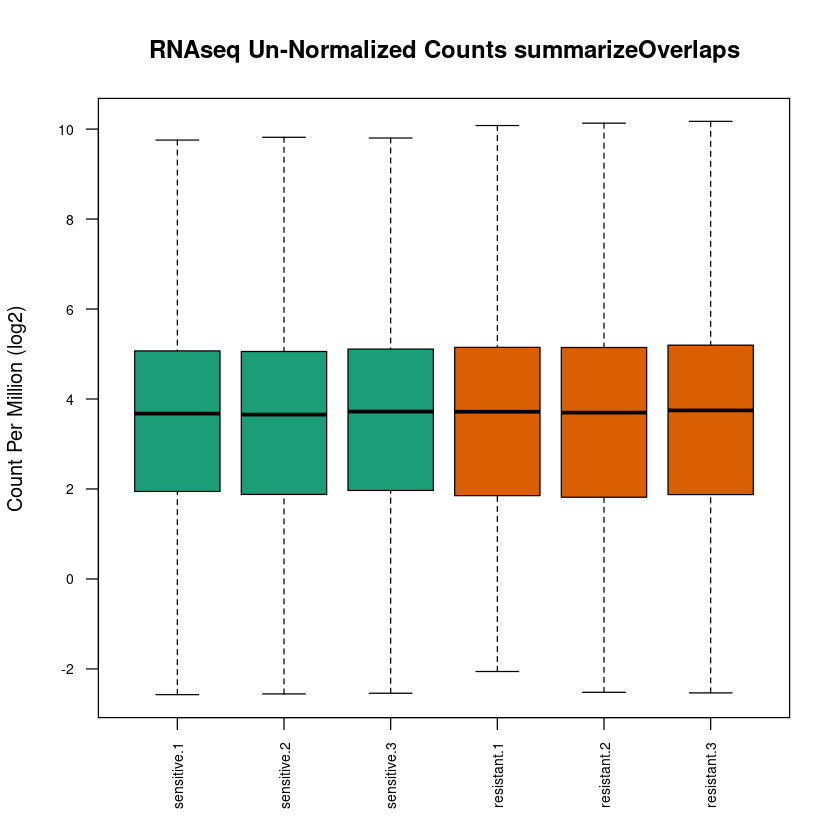

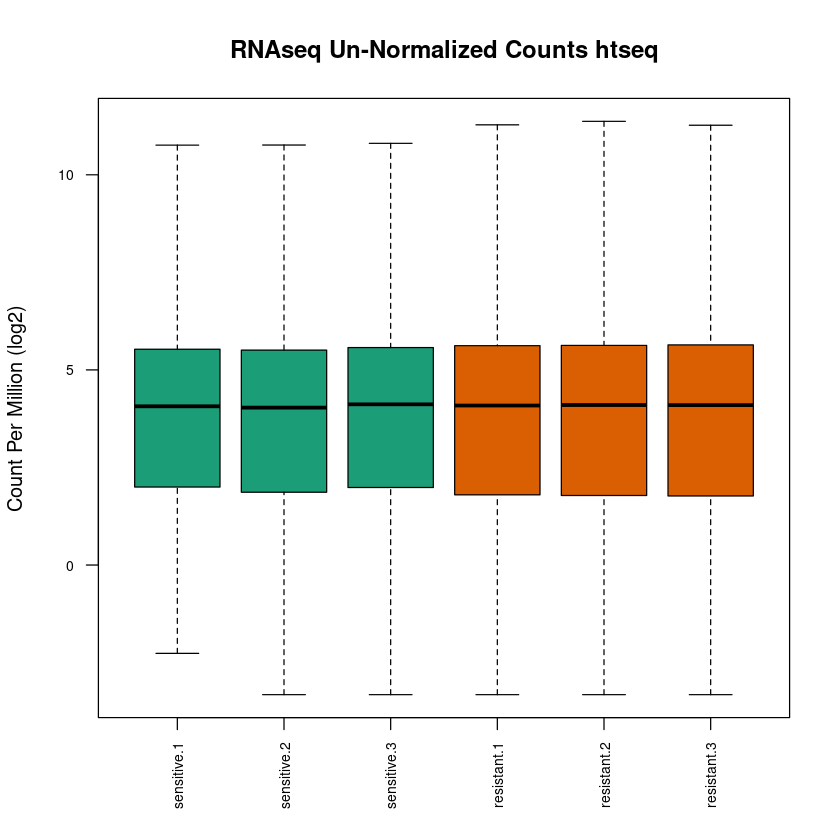

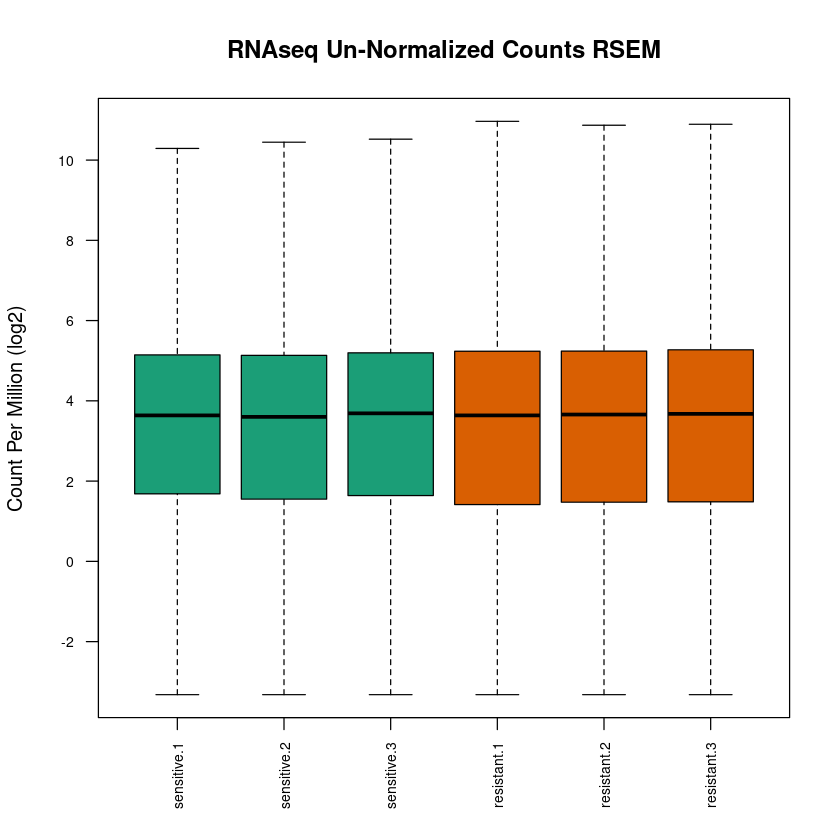

In [102]:
#library(RColorBrewer)
group_pal_so <- brewer.pal(4, "Dark2")
group_cols_so <- group_pal_so[my_dge_so$samples$group]
boxplot(log2(cpm_raw_so + 0.1), col=group_cols_so, las=2, outline=FALSE, names=pdata$sample.label, cex.axis=0.7, 
        main="RNAseq Un-Normalized Counts summarizeOverlaps", ylab="Count Per Million (log2)")

group_pal_htseq <- brewer.pal(4, "Dark2")
group_cols_htseq <- group_pal_htseq[my_dge_htseq$samples$group]
boxplot(log2(cpm_raw_htseq + 0.1), col=group_cols_htseq, las=2, outline=FALSE, names=pdata$sample.label, cex.axis=0.7, 
        main="RNAseq Un-Normalized Counts htseq", ylab="Count Per Million (log2)")

group_pal_rsem <- brewer.pal(4, "Dark2")
group_cols_rsem <- group_pal_rsem[my_dge_rsem$samples$group]
boxplot(log2(cpm_raw_rsem + 0.1), col=group_cols_rsem, las=2, outline=FALSE, names=pdata$sample.label, cex.axis=0.7, 
        main="RNAseq Un-Normalized Counts RSEM", ylab="Count Per Million (log2)")

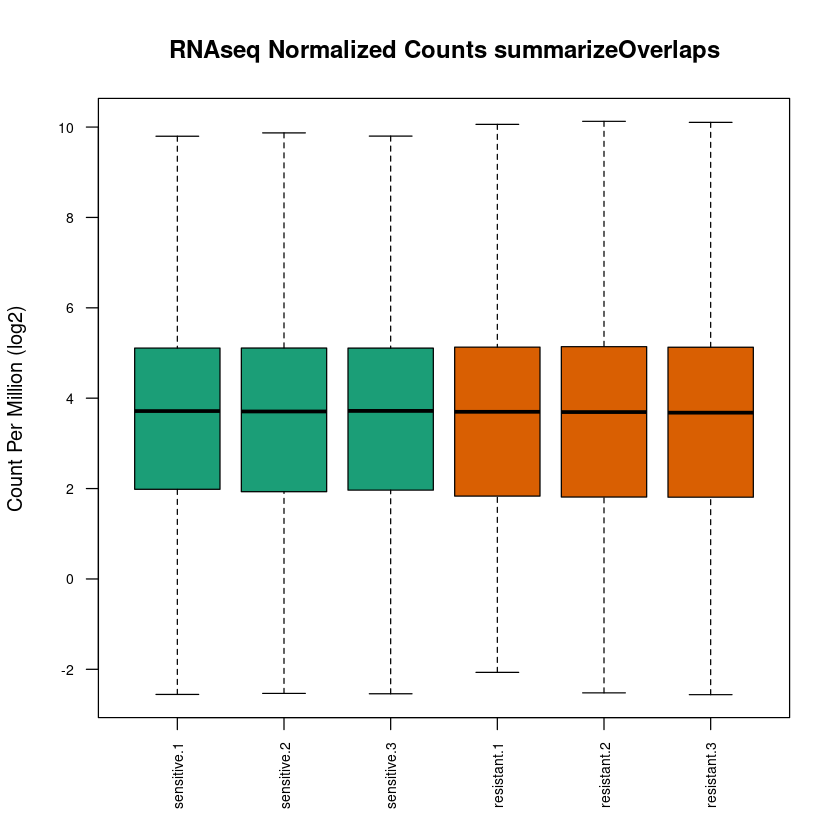

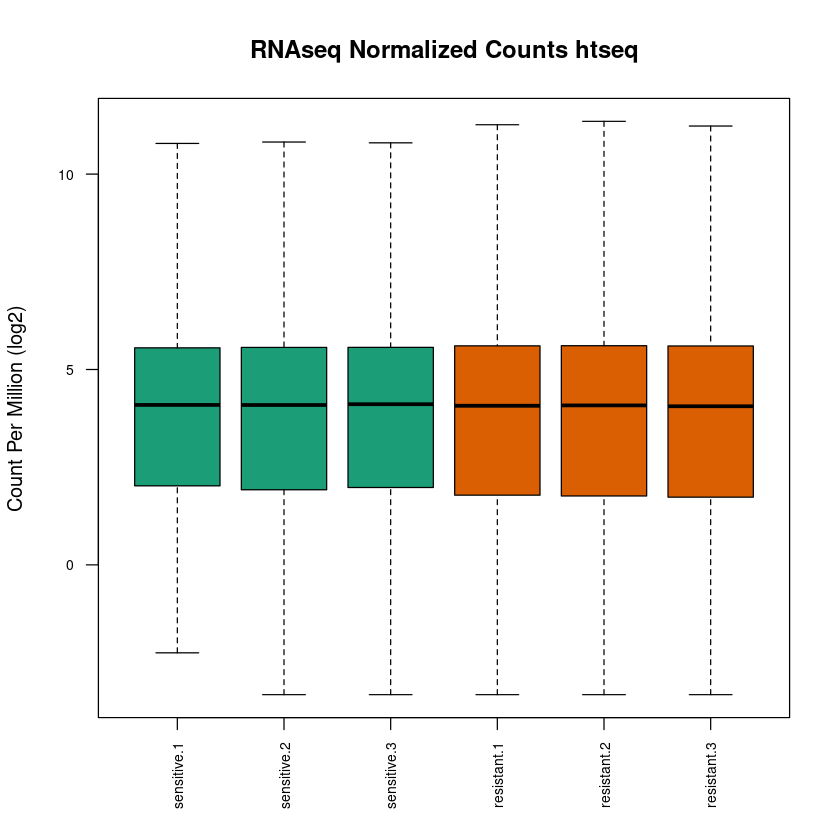

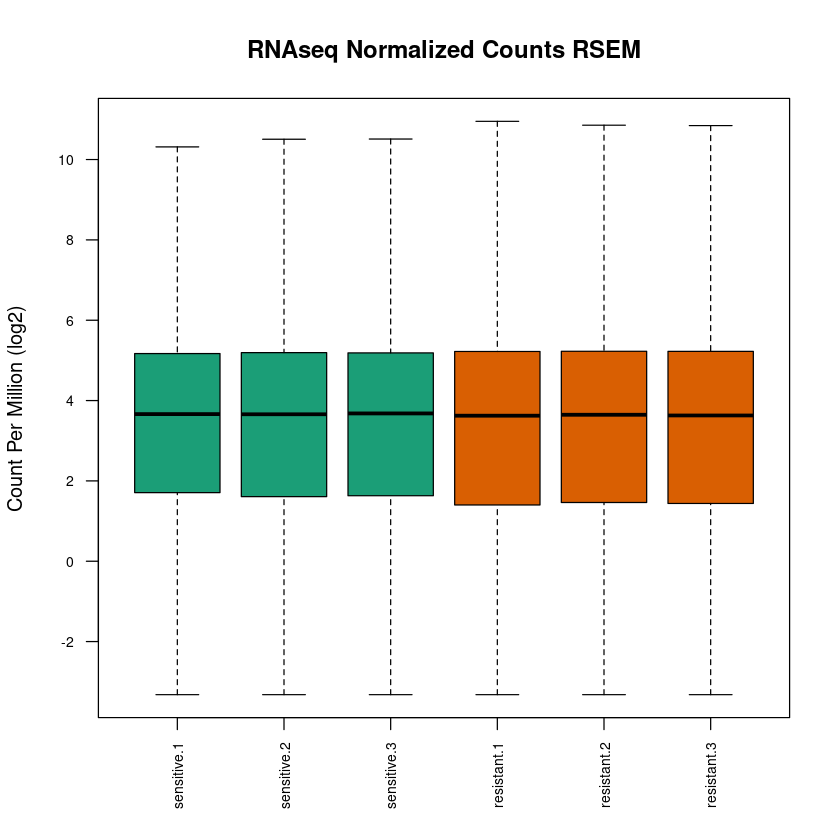

In [103]:
boxplot(log2(cpm_norm_so + 0.1), col=group_cols_so, las=2, outline=FALSE, names=pdata$sample.label, cex.axis=0.7, 
        main="RNAseq Normalized Counts summarizeOverlaps", ylab="Count Per Million (log2)")

boxplot(log2(cpm_norm_htseq + 0.1), col=group_cols_htseq, las=2, outline=FALSE, names=pdata$sample.label, cex.axis=0.7, 
        main="RNAseq Normalized Counts htseq", ylab="Count Per Million (log2)")

boxplot(log2(cpm_norm_rsem + 0.1), col=group_cols_rsem, las=2, outline=FALSE, names=pdata$sample.label, cex.axis=0.7, 
        main="RNAseq Normalized Counts RSEM", ylab="Count Per Million (log2)")

Despite the differences in the overall size of the libraries, they appear similar after normalization.  

The CPM values are a useful way to visualize RNA-seq data, but they do not account for the length of the transcripts.  This is one shortfall of RNA-seq over microarrays.  Expression of short genes is always at a disadvantage to expression of long genes because there is simply less RNA to sequence.  This is especially true if your RNA-seq analysis pipeline removes duplicate sequences.  

One thing that you can do is scale the CPM values accounting for the length of the genes.  Note, this IS NOT done for the actual differential expression analysis in **edgeR**.  It can be done to aid visualization and downstream functional analysis.

### Reads Per Kilobase Per Million
RPKM values can be used to compare relative expression levels of different genes.  Again, not generally on a statistical basis, but more for functional analysis.  To convert the CPM values to RPKM (Reads Per Kilobase Per Million), we need the length of the synthetic transcripts.  We can get this from the **GRangesList** that we made.  

In [180]:
#library(GenomicRanges, verbose=FALSE)
load("./data/GenesByExons.RData")
load("./data/GenesByExons_ensembl.RData")

First, we use **width** to get the length of each exon.  

In [181]:
exon_lengths <- width(genesByExon_gr)
head(exon_lengths)

exon_lengths_ensembl <- width(genesByExon_gr_ensembl)
head(exon_lengths_ensembl)

IntegerList of length 6
[["5S_rRNA"]] 126 110 119 106 119 119 115 87 120 119
[["5_8S_rRNA"]] 151 152 152 152 151 153 152 153 153
[["7SK"]] 250 250 250 244 331 298 247
[["A1BG"]] 1852 305 282 1165 270 36 89
[["A1BG-AS1"]] 127 1505 1742
[["A1CF"]] 7472 149 137 206 274 98 165 74 239 131 135 143 144 93 48 95

IntegerList of length 6
[["ENSG00000000003"]] 2879 108 6 84 135 99 75 189 914 47
[["ENSG00000000005"]] 131 132 412 102 154 167 378
[["ENSG00000000419"]] 1396 1369 105 1243 187 844 3539 193 400
[["ENSG00000000457"]] 4142 695 162 172 185 140 78 201 103 57 114 186 215 172 261
[["ENSG00000000460"]] 517 157 177 118 37 176 174 ... 96 114 105 81 113 120 1291
[["ENSG00000000938"]] 1059 132 154 77 180 156 150 104 99 103 679 63 195 110 121

Now, we can **sum** the length of the exons for each transcript using **sapply** to work down the list.  

In [182]:
transcript_lengths <- sapply(exon_lengths, sum)
head(transcript_lengths)

transcript_lengths_ensembl <- sapply(exon_lengths_ensembl, sum)
head(transcript_lengths_ensembl)

5S_rRNA 5_8S_rRNA       7SK      A1BG  A1BG-AS1      A1CF 
     1140      1369      1870      3999      3374      9603

ENSG00000000003 ENSG00000000005 ENSG00000000419 ENSG00000000457 ENSG00000000460 
           4536            1476            9276            6883            5970 
ENSG00000000938 
           3382

Now, we need to remove the same transcripts that we filtered from the **DGEList**.  

In [183]:
#lengths_keep <- transcript_lengths[keep_so]
#head(lengths_keep)

#lengths_keep_htseq <- transcript_lengths_ensembl[keep_htseq]
#head(lengths_keep_htseq)

lengths_keep_rsem <- transcript_lengths[keep_rsem]
head(lengths_keep_rsem)

5S_rRNA      7SK     A1BG A1BG-AS1      A2M    A2ML1 
    1140     1870     3999     3374     6318     7156

We can confirm that the dimension and order of the transcript lengths is the same as the order of the transcripts in **cpm_norm**.

In [184]:
#lengths_keep_so<-lengths_keep[names(lengths_keep) %in% rownames(my_dge_so$counts)]
#length(lengths_keep_so)
#dim(my_dge_so)

#lengths_keep_htseq<-lengths_keep_htseq[names(lengths_keep_htseq) %in% rownames(my_dge_htseq$counts)]
#length(lengths_keep_htseq)
#dim(my_dge_htseq)

lengths_keep_rsem<-lengths_keep_rsem[names(lengths_keep_rsem) %in% rownames(my_dge_rsem$counts)]
length(lengths_keep_rsem)
dim(my_dge_rsem)

[1] 0

[1] 16485     6

In [185]:

#table(names(lengths_keep_so) == rownames(my_dge_so$counts))
#head(names(lengths_keep_so)) # print first 6 names
#head(rownames(my_dge_so$counts))


#table(names(lengths_keep_htseq) == rownames(my_dge_htseq$counts))
#head(names(lengths_keep_htseq)) # print first 6 names
#head(rownames(my_dge_htseq$counts))


table(names(lengths_keep_rsem) == rownames(my_dge_rsem$counts))
head(names(lengths_keep_rsem)) # print first 6 names
head(rownames(my_dge_rsem$counts))

< table of extent 0 >

character(0)

[1] "ENSG00000000003" "ENSG00000000419" "ENSG00000000457" "ENSG00000000460"
[5] "ENSG00000000971" "ENSG00000001084"

In [186]:
#rpkm_norm_so <- rpkm(my_dge_so, gene.length=lengths_keep, normalized.lib.sizes=TRUE, log=FALSE)
#head(rpkm_norm_so)

#rpkm_norm_htseq <- rpkm(my_dge_htseq, gene.length=lengths_keep_htseq, normalized.lib.sizes=TRUE, log=FALSE)
#head(rpkm_norm_htseq)

rpkm_norm_rsem <- rpkm(my_dge_rsem, gene.length=lengths_keep_rsem, normalized.lib.sizes=TRUE, log=FALSE)
head(rpkm_norm_rsem)

numeric(0)

We are now ready to start the **edgeR** analysis.

## Making the Model Matrix

The next step in the analysis is to describe the experiment and analysis for **edgeR** in the form of a matrix. The matrix must have one row for every sample and one column for each of the experimental effects/groups that you want to compare.

What experimental effects should we compare? For this data, we have one control (BPH) and three treatment groups (CaP, advanced CaP and CRPC). We could specify a design to estimate each group's effect separately (as well as any interaction). This will allow us to specify pairwise contrasts later.

The `model.matrix` function makes this quite simple because it can pull the information from the pData. However, it is always a good idea to check your matrix.

In [187]:
#my_design_so <- model.matrix(~ 0 + my_dge_so$samples$group)
#rownames(my_design_so) <- rownames(my_dge_so$sample)
#colnames(my_design_so) <- levels(my_dge_so$sample$group)
#my_design_so

#my_design_htseq <- model.matrix(~ 0 + my_dge_htseq$samples$group)
#rownames(my_design_htseq) <- rownames(my_dge_htseq$sample)
#colnames(my_design_htseq) <- levels(my_dge_htseq$sample$group)
#my_design_htseq

my_design_rsem <- model.matrix(~ 0 + my_dge_rsem$samples$group)
rownames(my_design_rsem) <- rownames(my_dge_rsem$sample)
colnames(my_design_rsem) <- levels(my_dge_rsem$sample$group)
my_design_rsem

,sensitive,resistant
PDX4_SE1,1,0
PDX4_SE2,1,0
PDX4_SE3,1,0
PDX4_CR1,0,1
PDX4_CR2,0,1
PDX4_CR3,0,1


We are finally getting to the statistical analysis.

RNAseq data is based on counts and is discrete (integer values only). Because of the nature of the data, edgeR uses **exactTest** function to perform a test that is based on the negative binomial distribution. Earlier methods of RNAseq analysis used the Poisson distribution, but these methods have fallen out of favor because the Poisson distribution is not a good fit for RNAseq data.

## Estimate Dispersion

First, we need to estimate the dispersion in the gene counts.  The disperion is the variability in the data, sometimes from biological sources, but technical factors can also affect disperion.  Note that **edgeR** allows you to set a minimal expression threshold for the genes.  We have already filtered our data, so I set this to zero.  

In [188]:
#library(statmod, verbose=FALSE)
#my_dge_so <- estimateDisp(my_dge_so, design=my_design_so, min.row.sum=0, robust=TRUE)

#my_dge_htseq <- estimateDisp(my_dge_htseq, design=my_design_htseq, min.row.sum=0, robust=TRUE)

my_dge_rsem <- estimateDisp(my_dge_rsem, design=my_design_rsem, min.row.sum=0, robust=TRUE)

Now, we can plot the dispersion.  Three values are shown:
* **Tagwise** - The actual dispresion of each individual gene.
* **Common** - The estimate for all genes.
* **Trended** - Takes into account the value of the counts, i.e. low expressing gene often have high disperion.

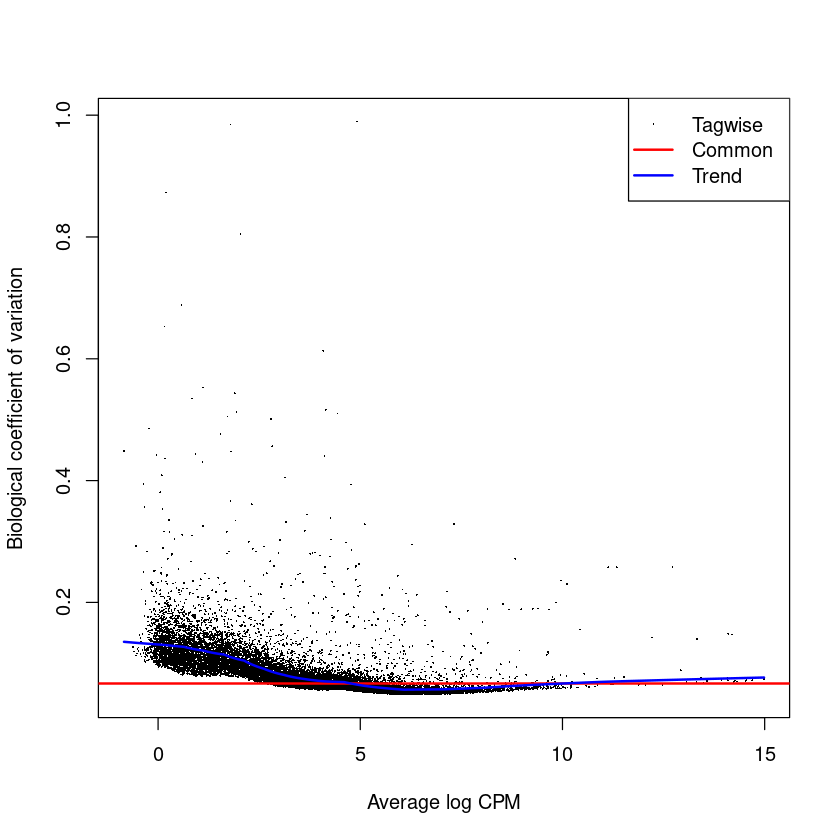

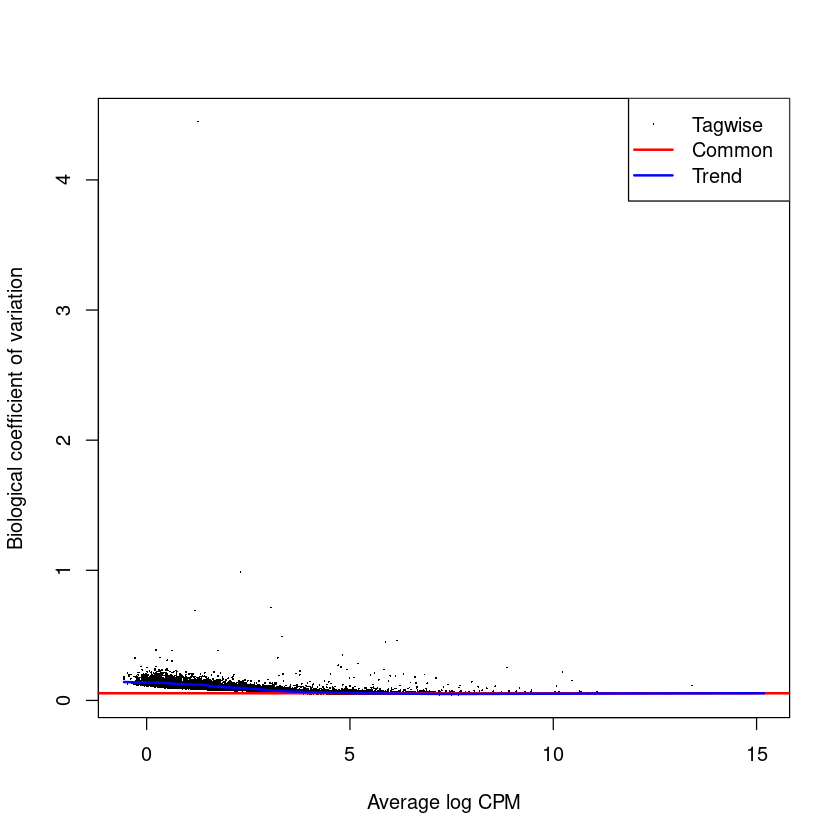

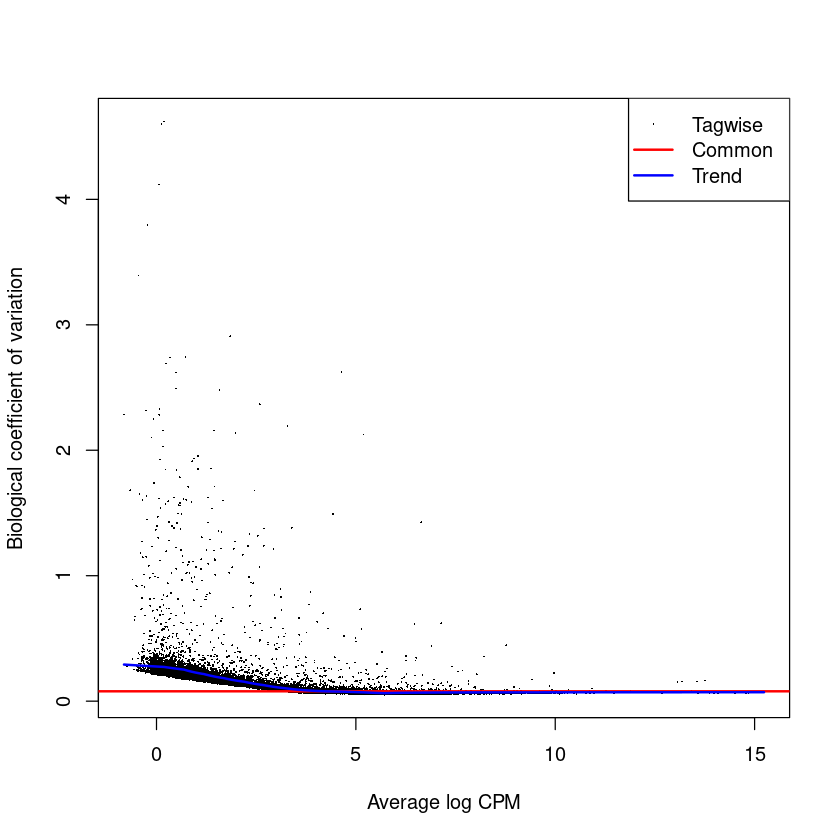

In [113]:
plotBCV(my_dge_so)

plotBCV(my_dge_htseq)

plotBCV(my_dge_rsem)

### MDS Plots to Assess Replicates

Note: the bcv method is now scheduled to be removed in a future release of edgeR.

Note: the bcv method is now scheduled to be removed in a future release of edgeR.



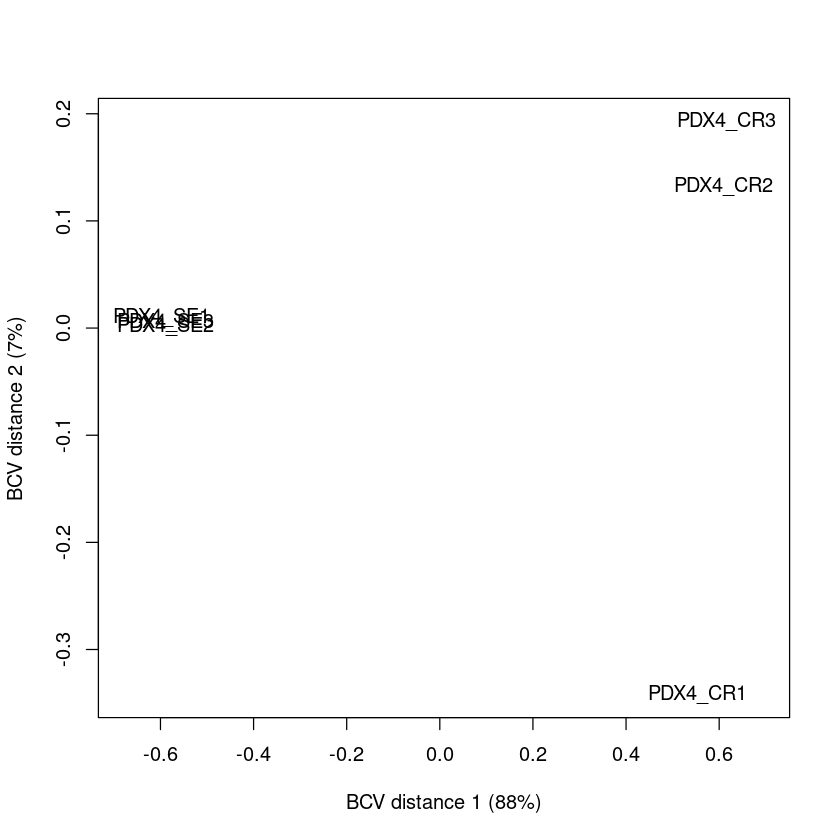

Note: the bcv method is now scheduled to be removed in a future release of edgeR.



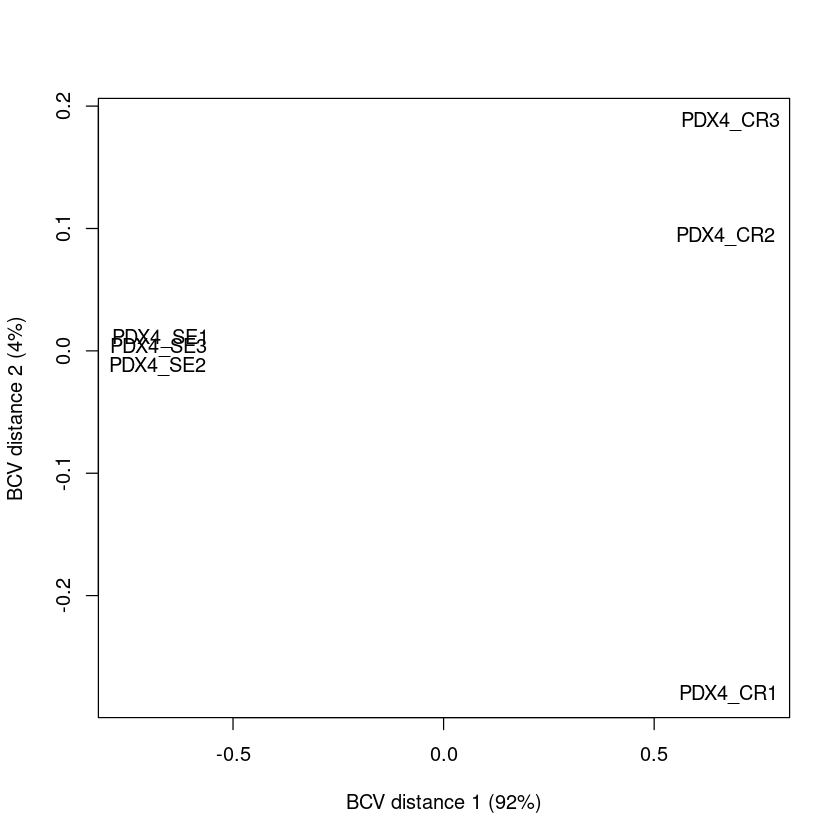

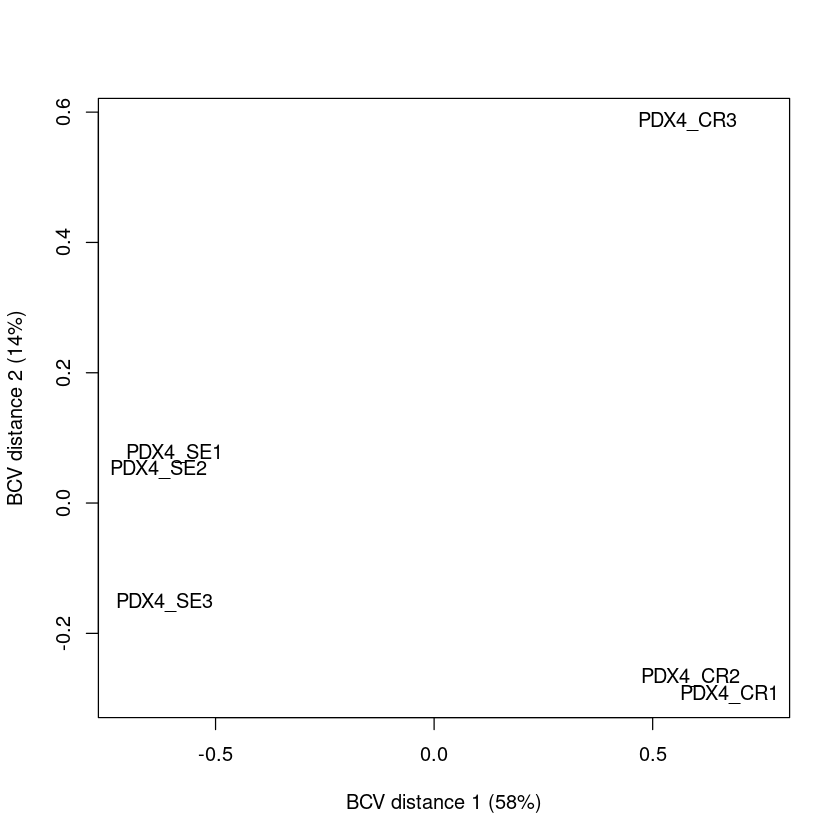

In [114]:
plotMDS(my_dge_so, method="bcv", top=500)

plotMDS(my_dge_htseq, method="bcv", top=500)

plotMDS(my_dge_rsem, method="bcv", top=500)

We can add group labels and color the samples by group.

Note: the bcv method is now scheduled to be removed in a future release of edgeR.

Note: the bcv method is now scheduled to be removed in a future release of edgeR.



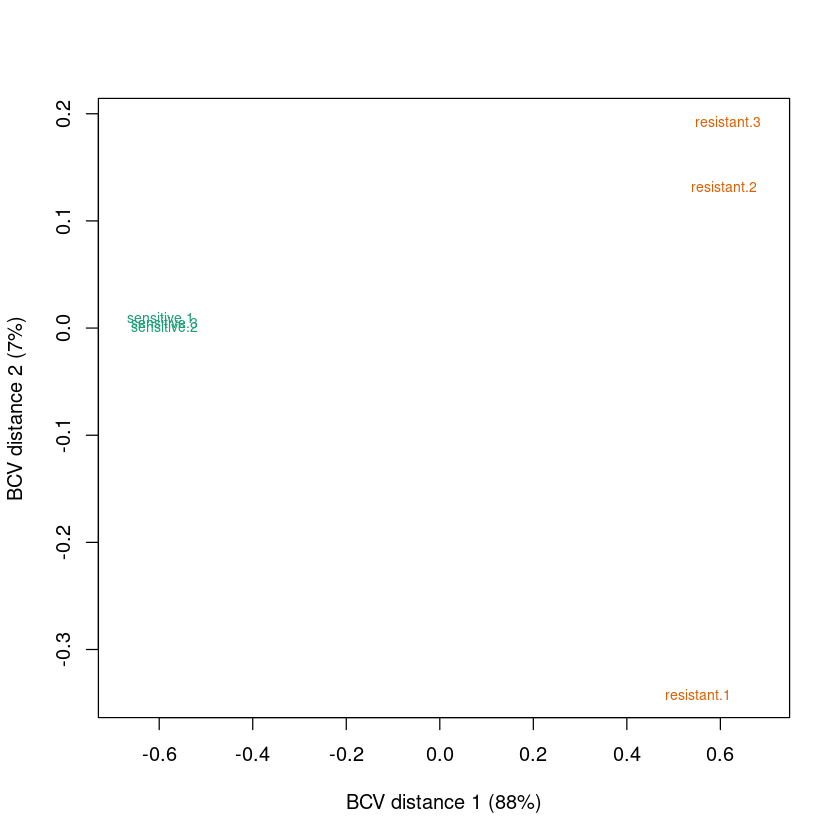

Note: the bcv method is now scheduled to be removed in a future release of edgeR.



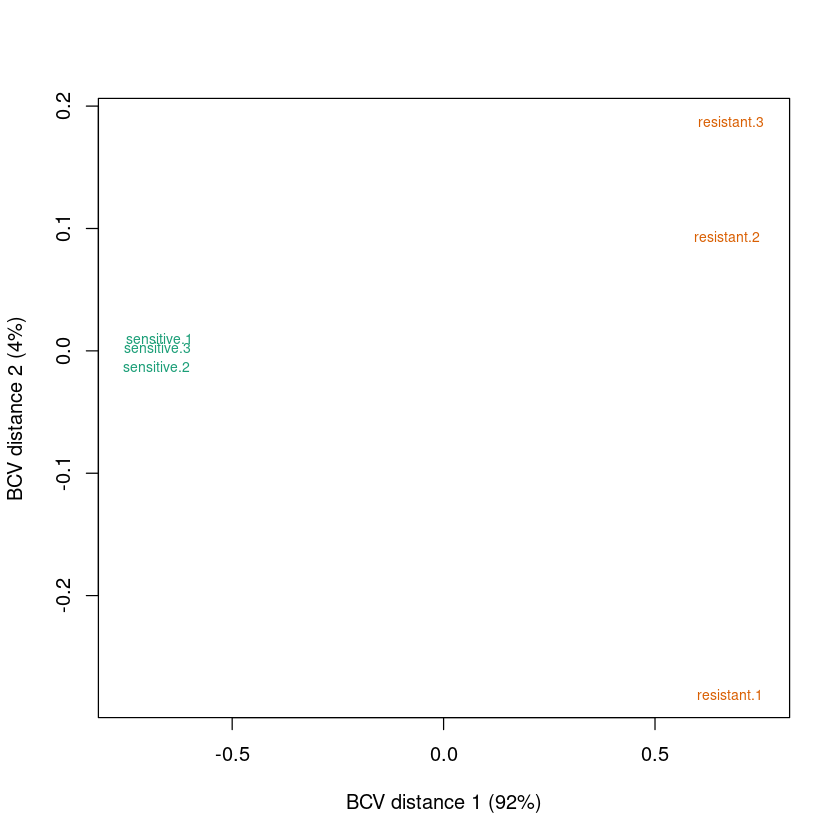

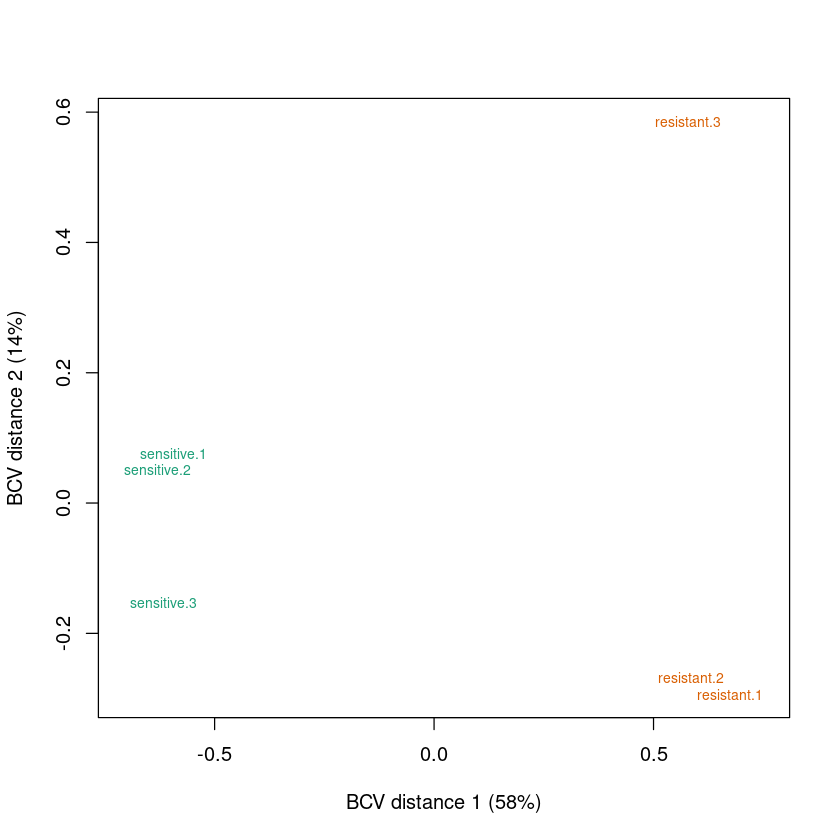

In [115]:
plotMDS(my_dge_so, method="bcv", top=500, labels=as.factor(my_dge_so$samples$sample.label), cex=0.7, col=group_cols_so)

plotMDS(my_dge_htseq, method="bcv", top=500, labels=as.factor(my_dge_htseq$samples$sample.label), cex=0.7, col=group_cols_htseq)

plotMDS(my_dge_rsem, method="bcv", top=500, labels=as.factor(my_dge_rsem$samples$sample.label), cex=0.7, col=group_cols_rsem)

The BCV MDS plot shows that there is good agreement between biological replicates in control and CaP. But the agreement in CRPC and advanced CaP is not so satifying. There also appears to be a clear experiment effect for the knockdowns. We can confirm with a similar plot that uses log fold change (logFC).

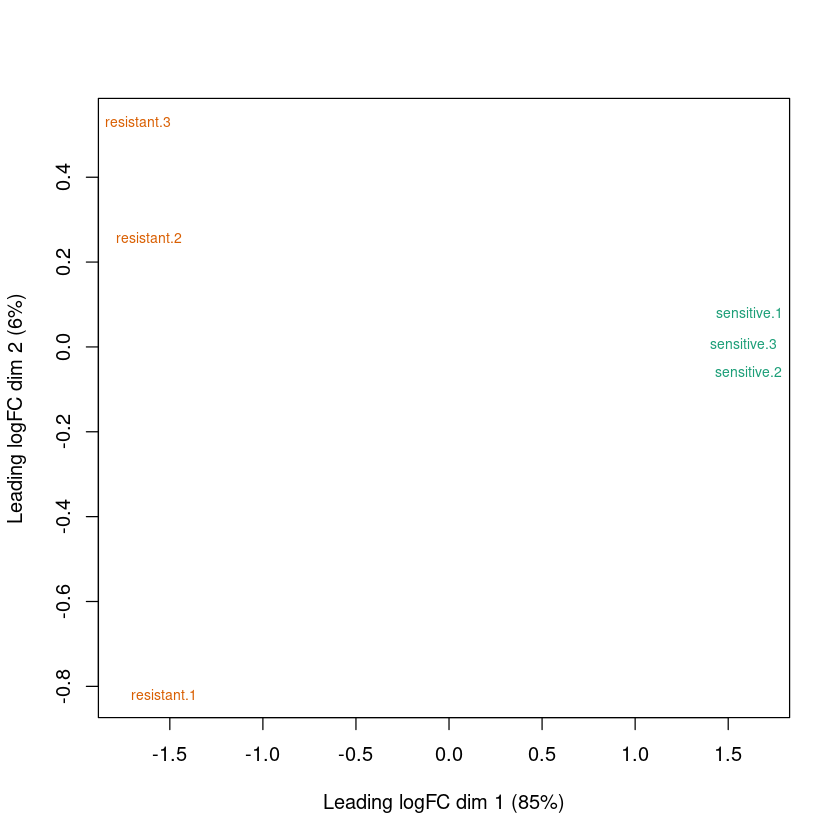

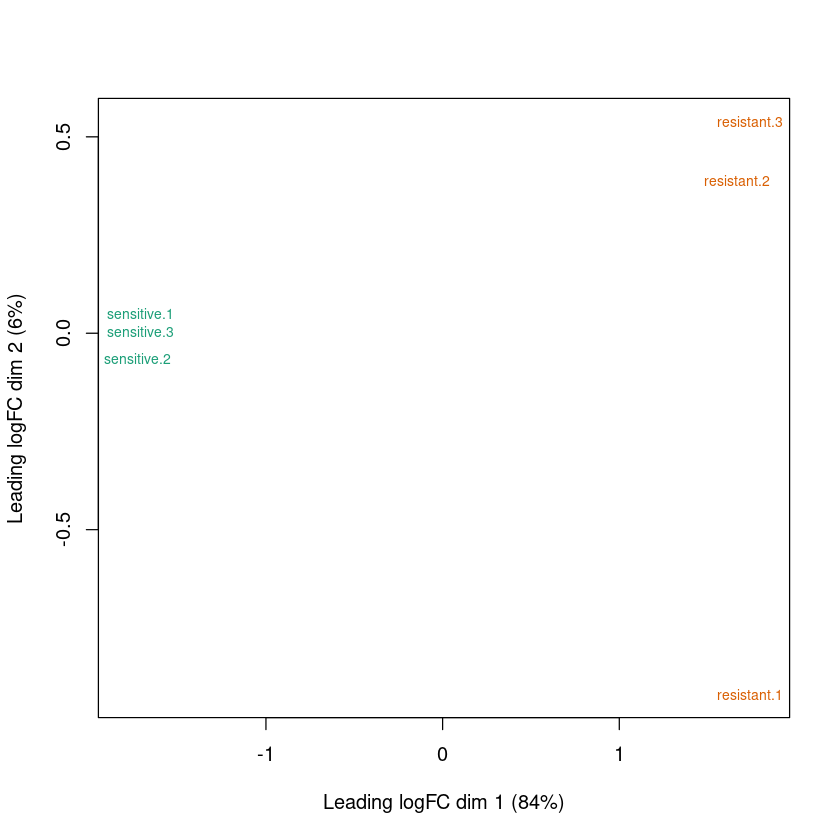

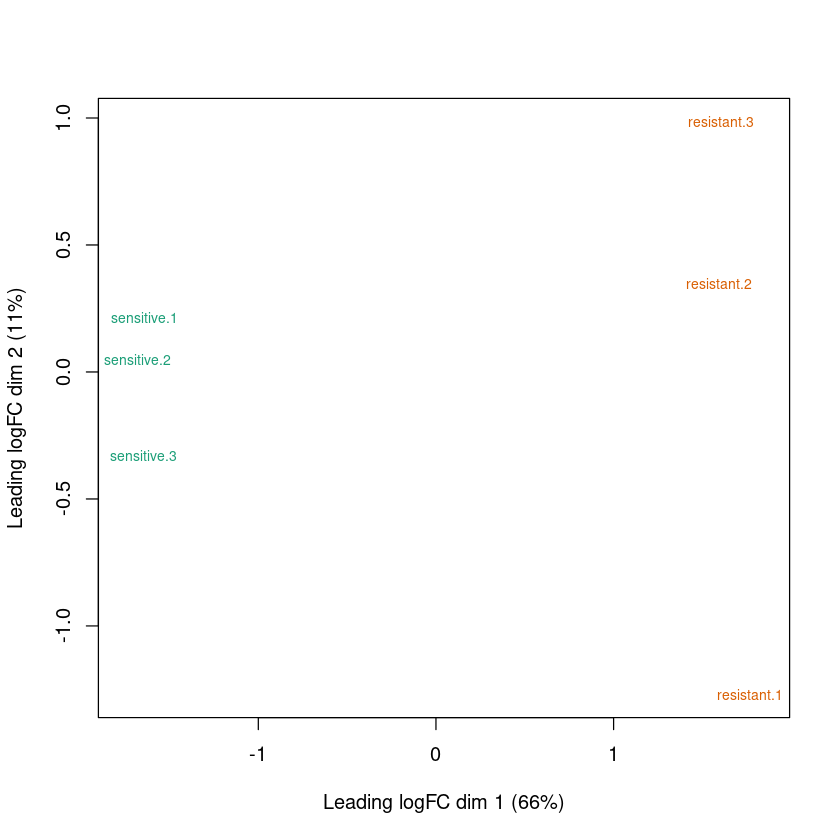

In [116]:
plotMDS(my_dge_so, method="logFC", top=500, labels=my_dge_so$samples$sample.label, cex=0.7, col=group_cols_so)

plotMDS(my_dge_htseq, method="logFC", top=500, labels=my_dge_htseq$samples$sample.label, cex=0.7, col=group_cols_htseq)

plotMDS(my_dge_rsem, method="logFC", top=500, labels=my_dge_rsem$samples$sample.label, cex=0.7, col=group_cols_rsem)

The logFC MDS plot also shows a similar result.

### Hierarchical Clustering
We can confirm the MDS plots by hierarchical clustering.  

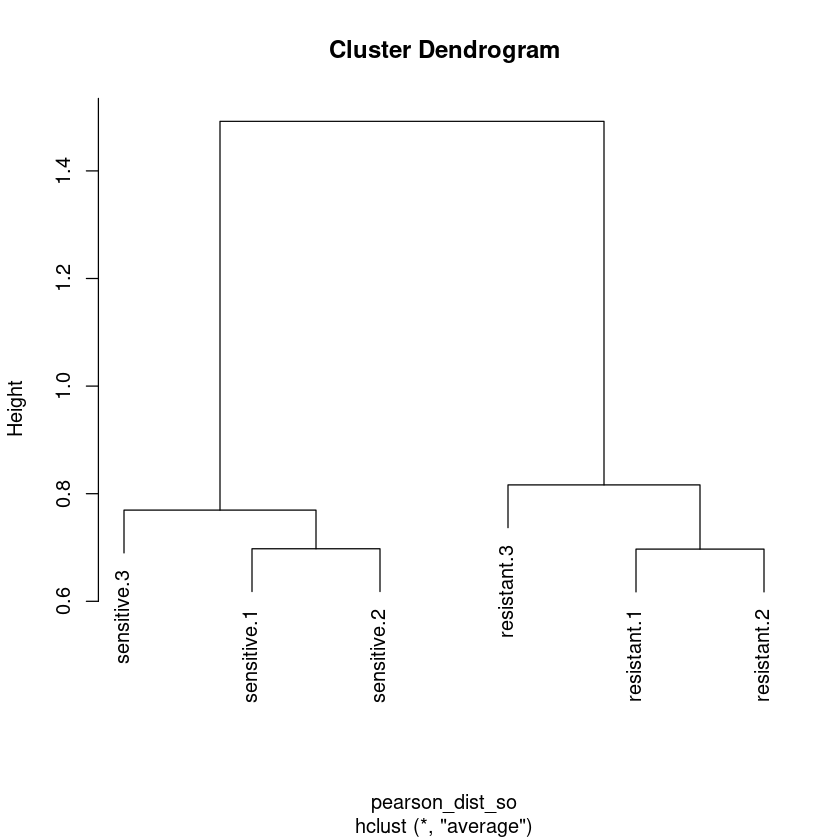

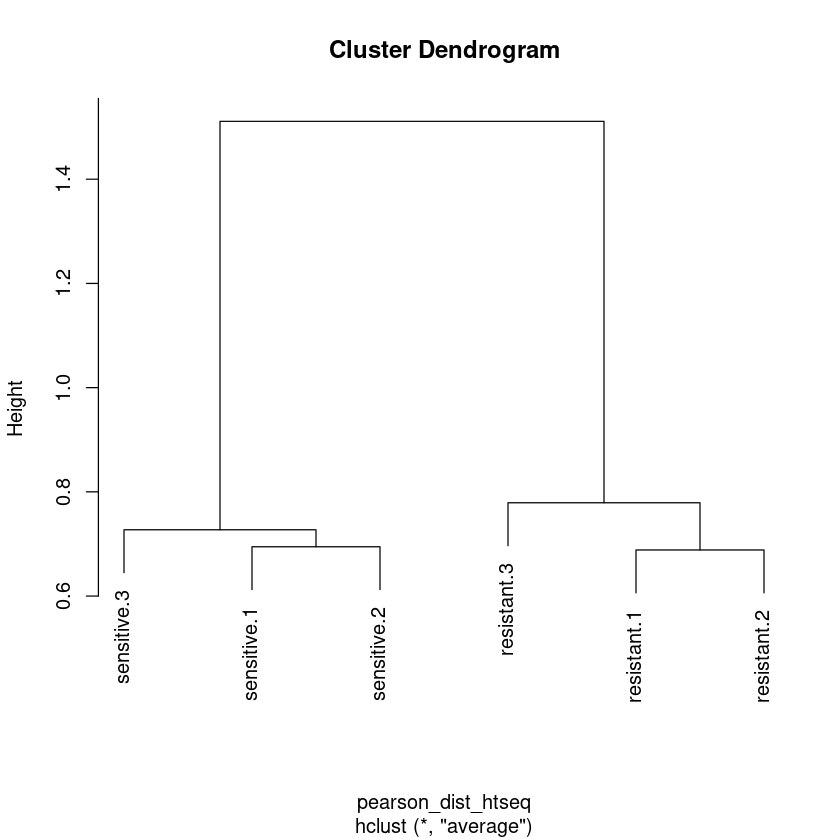

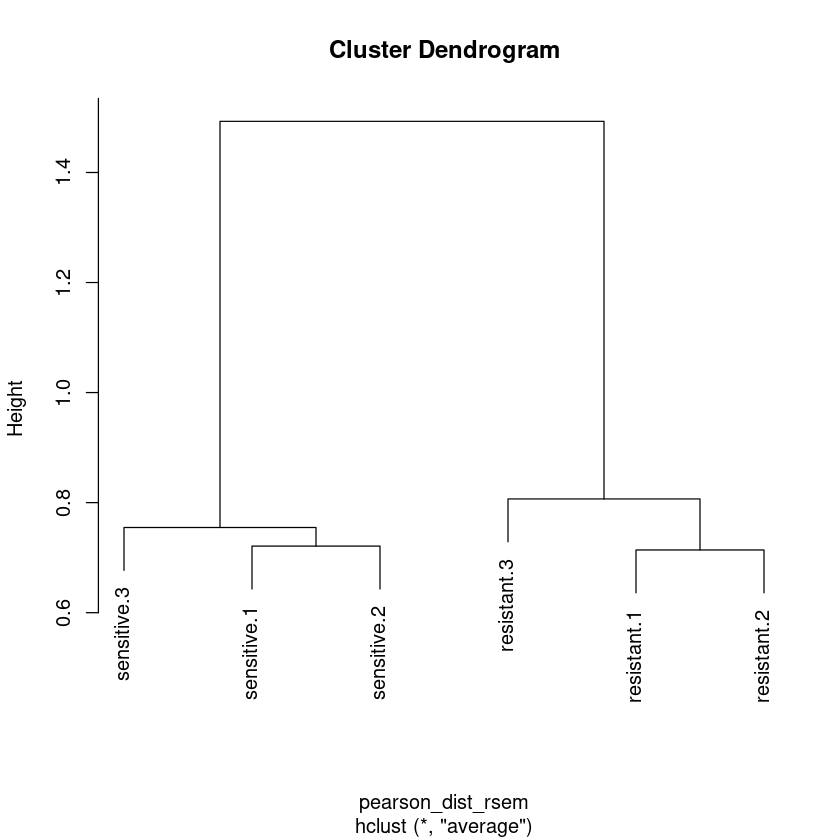

In [117]:
rpkm_mean_so <- rowMeans(rpkm_norm_so)
rpkm_sd_so <- apply(rpkm_norm_so, 1, sd)
rpkm_zscores_so <- sweep(rpkm_norm_so, 1, rpkm_mean_so, "-")
rpkm_zscores_so <- sweep(rpkm_zscores_so, 1, rpkm_sd_so, "/")
pearson_dist_so <- cor(rpkm_zscores_so, method="pearson", use="everything")
pearson_dist_so <- as.dist(1 - pearson_dist_so)
my_hclust_so <- hclust(pearson_dist_so, "average")
my_hclust_so$labels <- pdata$sample.label
plot(my_hclust_so)

rpkm_mean_htseq <- rowMeans(rpkm_norm_htseq)
rpkm_sd_htseq <- apply(rpkm_norm_htseq, 1, sd)
rpkm_zscores_htseq <- sweep(rpkm_norm_htseq, 1, rpkm_mean_htseq, "-")
rpkm_zscores_htseq <- sweep(rpkm_zscores_htseq, 1, rpkm_sd_htseq, "/")
pearson_dist_htseq <- cor(rpkm_zscores_htseq, method="pearson", use="everything")
pearson_dist_htseq <- as.dist(1 - pearson_dist_htseq)
my_hclust_htseq <- hclust(pearson_dist_htseq, "average")
my_hclust_htseq$labels <- pdata$sample.label
plot(my_hclust_htseq)

rpkm_mean_rsem <- rowMeans(rpkm_norm_rsem)
rpkm_sd_rsem <- apply(rpkm_norm_rsem, 1, sd)
rpkm_zscores_rsem <- sweep(rpkm_norm_rsem, 1, rpkm_mean_rsem, "-")
rpkm_zscores_rsem <- sweep(rpkm_zscores_rsem, 1, rpkm_sd_rsem, "/")
pearson_dist_rsem <- cor(rpkm_zscores_rsem, method="pearson", use="everything")
pearson_dist_rsem <- as.dist(1 - pearson_dist_rsem)
my_hclust_rsem <- hclust(pearson_dist_rsem, "average")
my_hclust_rsem$labels <- pdata$sample.label
plot(my_hclust_rsem)

The two groups "CRPC" and "advanced CaP" are more similar to each other than to the control.  That is an important point.  

In [118]:
save(my_dge_so,file="./data/my_dge_so.RData")

save(my_dge_htseq,file="./data/my_dge_htseq.RData")

save(my_dge_rsem,file="./data/my_dge_rsem.RData")

## Perform Statistical Tests

### exactTest
There are various methods in **edgeR** to compare groups.  Here, we will use the **exactTest** that will do direct comparisons of the counts for two groups.  This method performs well in benchmarking tests of **edgeR**, see [Schurch, et al](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4878611/) and is suitable for this experiment.  Again, I recommend that you keep the default arguments unless you have good reason to change them.

The **pair** argument specifies the groups that you want to compare.  Our first group is **BPH** and the 4th is **CRPC**, so **pair=c(1, 4)** is **CRPC / BPH**.

In [189]:
#resistant_et_so <- exactTest(my_dge_so, pair=1:2, dispersion="auto", rejection.region="deviance",
                     big.count=900, prior.count=0.125)

#resistant_et_htseq <- exactTest(my_dge_htseq, pair=1:2, dispersion="auto", rejection.region="deviance",
                     big.count=900, prior.count=0.125)

resistant_et_rsem <- exactTest(my_dge_rsem, pair=1:2, dispersion="auto", rejection.region="deviance",
                     big.count=900, prior.count=0.125)
# the options shown here are alll default values

ERROR: Error in parse(text = x, srcfile = src): <text>:2:35: unexpected ','
1: #resistant_et_so <- exactTest(my_dge_so, pair=1:2, dispersion="auto", rejection.region="deviance",
2:                      big.count=900,
                                     ^


### topTags
Similar to limma, the **topTags** function will summarize the tests.  I always select all genes and do not sort.  The resulting object is a list with multiple elements, including a table of results. The **logFC** is the log2 ratio of the change between the two groups. And **FDR** is the p-value after adjusting for multiple testing. We use benjamini-hochberg procedure ("BH") for adjustment.

In [190]:
#resistant_tt_so <- topTags(resistant_et_so, n=nrow(my_dge_so), sort.by="none")
#head(resistant_tt_so)

#resistant_tt_htseq <- topTags(resistant_et_htseq, n=nrow(my_dge_htseq), sort.by="none")
#head(resistant_tt_htseq)

resistant_tt_rsem <- topTags(resistant_et_rsem, n=nrow(my_dge_rsem), sort.by="none")
head(resistant_tt_rsem)

,logFC,logCPM,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003,-0.32903452,2.036873,0.2089925,0.3623900
ENSG00000000419,-0.10244537,5.395727,0.2884322,0.4563751
ENSG00000000457,-0.02179368,3.576523,0.9077657,0.9650969
ENSG00000000460,-0.05257911,3.542651,0.7123860,0.8353703
ENSG00000000971,0.10923246,9.807134,0.1432649,0.2726216
ENSG00000001084,4.22880404,7.358741,0.0000000,0.0000000


### decideTests
The **decideTestsDGE** will produce a vector of gene calls based on your specified cutoffs. We use the option `p.value` to specify the cut-off at 0.05. `lfc` is the minimum absolute log2 fold change required, so I just keep the default of 0.

The result is a table of either 0,1 or -1 for each genes, where **0** indicates no significant change between groups, **1** indicates a positive change or upregulated from control to treatment, and **-1** indicates a negative change or downregulated in expression.

In [121]:
resistant_tests_so <- decideTestsDGE(resistant_et_so, adjust.method="BH", p.value=0.05, lfc=0)
head(resistant_tests_so)

resistant_tests_htseq <- decideTestsDGE(resistant_et_htseq, adjust.method="BH", p.value=0.05, lfc=0)
head(resistant_tests_htseq)

resistant_tests_rsem <- decideTestsDGE(resistant_et_rsem, adjust.method="BH", p.value=0.05, lfc=0)
head(resistant_tests_rsem)

,resistant-sensitive
5_8S_rRNA,0
7SK,-1
A1BG-AS1,0
A2M-AS1,0
AAAS,0
AACS,0


,resistant-sensitive
ENSG00000000003,0
ENSG00000000419,0
ENSG00000000457,0
ENSG00000000460,0
ENSG00000000971,-1
ENSG00000001084,1


,resistant-sensitive
ENSG00000000003,0
ENSG00000000419,0
ENSG00000000457,0
ENSG00000000460,0
ENSG00000000971,0
ENSG00000001084,1


We can summarize the differentially expressed genes (DEGs) with **table** to check how many differential genes we have. 

In [122]:
table(resistant_tests_so)

table(resistant_tests_htseq)

table(resistant_tests_rsem)

resistant_tests_so
  -1    0    1 
2994 9899 2806 

resistant_tests_htseq
  -1    0    1 
3140 8783 3040 

resistant_tests_rsem
   -1     0     1 
 2863 10809  2813 

This table shows that we got 15966 insignificant genes, 764 genes with upregulated effects in CRPC and 1276 genes with downregulated effects in CRPC.

### Practice:

We performed an Exact test on only one pair of groups, 'BPH' and 'CRPC' group. Repeat the above exact test using another pair of groups. Note that the first level will be used as a control group. Summarize the test results with `topTags` and `decideTestsDGE` function. How many differentially expressed genes (DGEs) do you have for your selected groups?

In [123]:
# write your codes here



**Write down which groups you selected, and summarize how many DGEs did you get? (Double click to enable editing.)**




## Visualizing the Results

There are several ways to visually summarize the results of your experiment.  A smear plot shows the relationship between gene counts and log fold-change.  Differentially expressed genes can be highlighted. Each point is a gene and significant genes are highlighted in red.

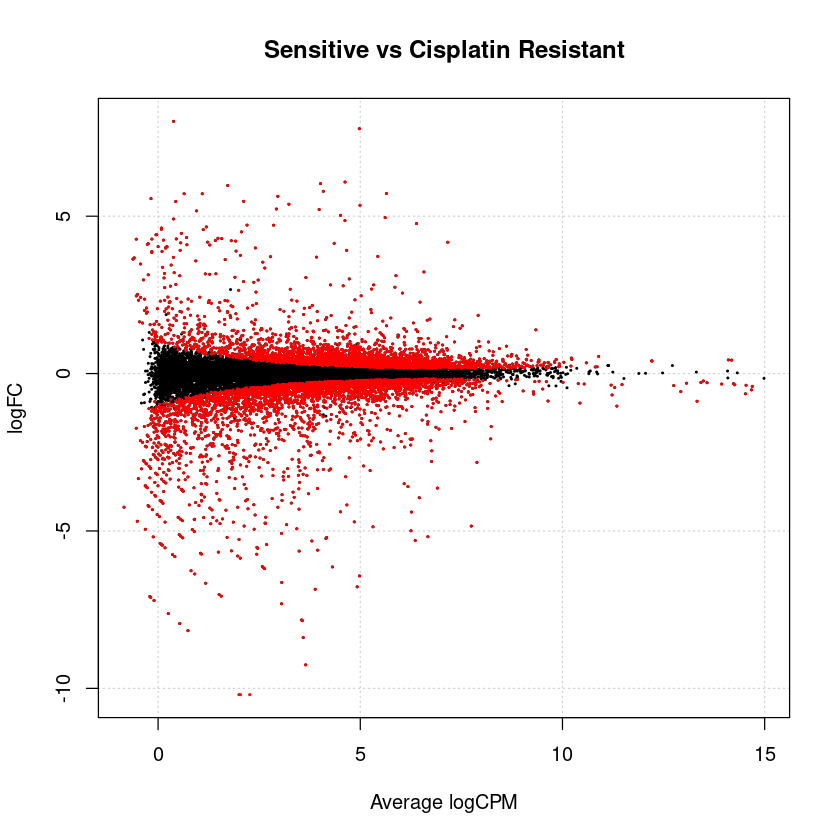

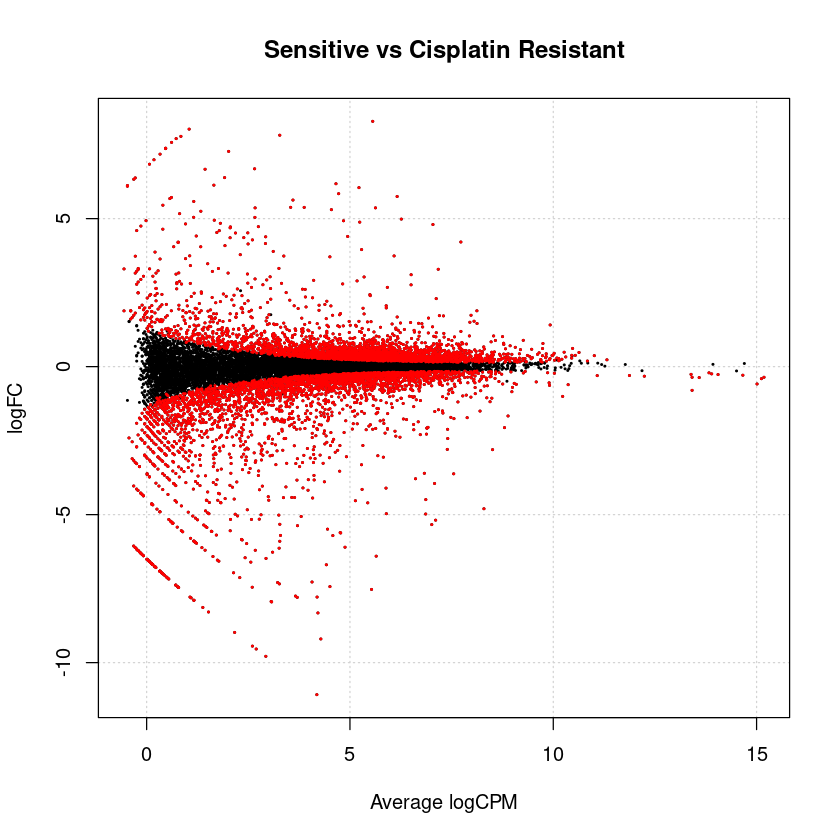

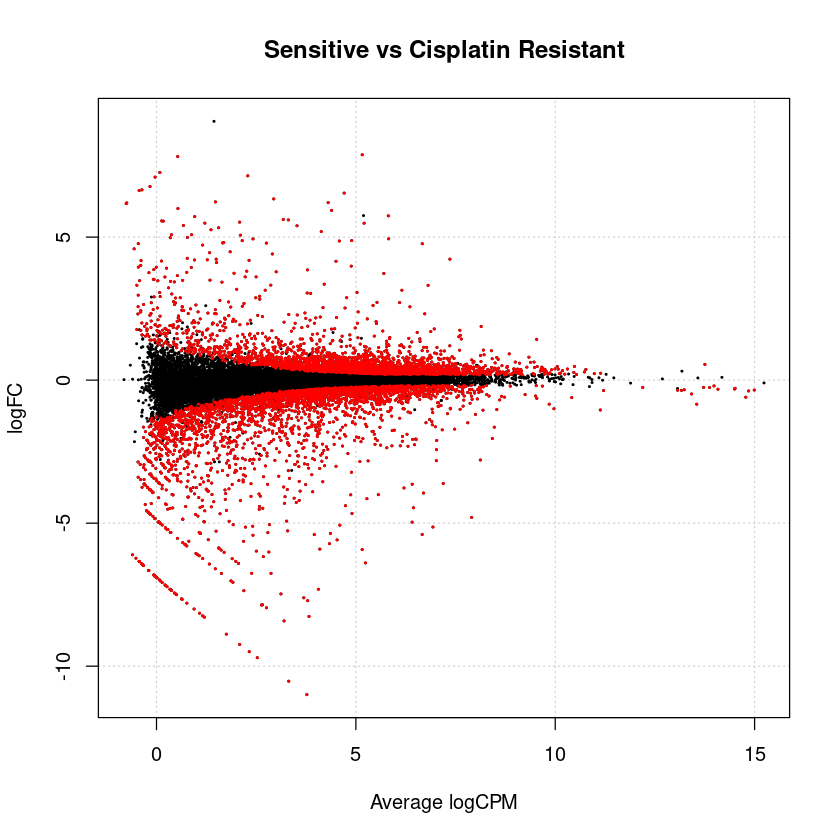

In [124]:
plotSmear(resistant_et_so, de.tags=rownames(resistant_tt_so)[resistant_tests_so != 0], main="Sensitive vs Cisplatin Resistant")

plotSmear(resistant_et_htseq, de.tags=rownames(resistant_tt_htseq)[resistant_tests_htseq != 0], main="Sensitive vs Cisplatin Resistant")

plotSmear(resistant_et_rsem, de.tags=rownames(resistant_tt_rsem)[resistant_tests_rsem != 0], main="Sensitive vs Cisplatin Resistant")


It should not be surprising that genes with high average counts can have only modest log fold-changes, but still be considered statistically significant.  As a researcher, you must decide if you want to set a log fold-change cutoff.  

### Volcano Plots
Volcano plots visualize the relationship between FDR (-log10) and log2 fold-change. Still, each point is a gene. Genes with significant positive effect is highlighted in red while genes with negative effect is highlighted in blue.

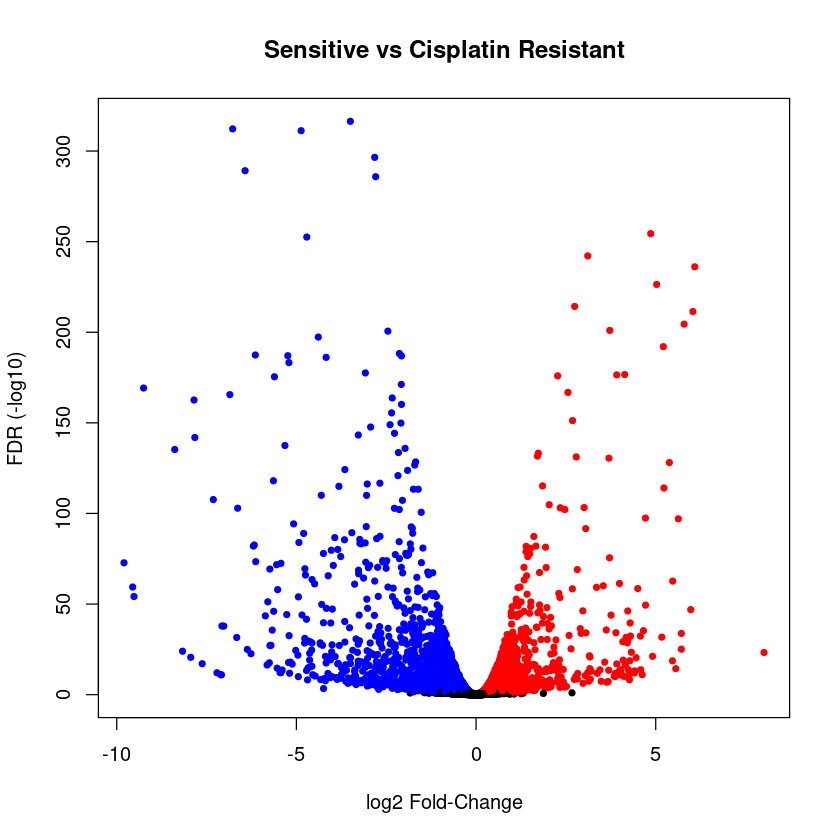

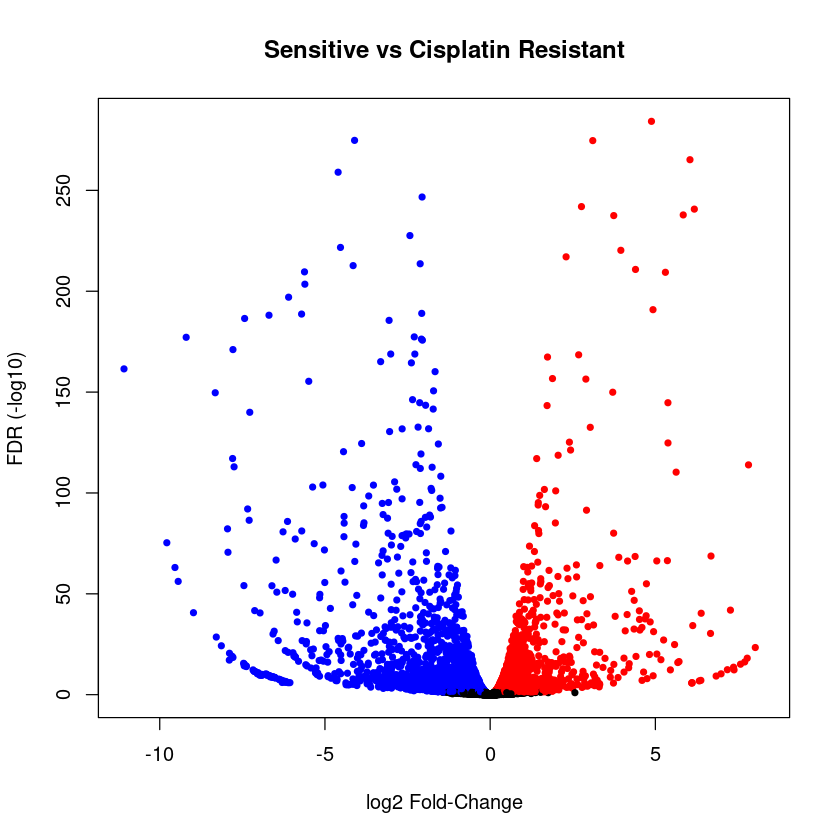

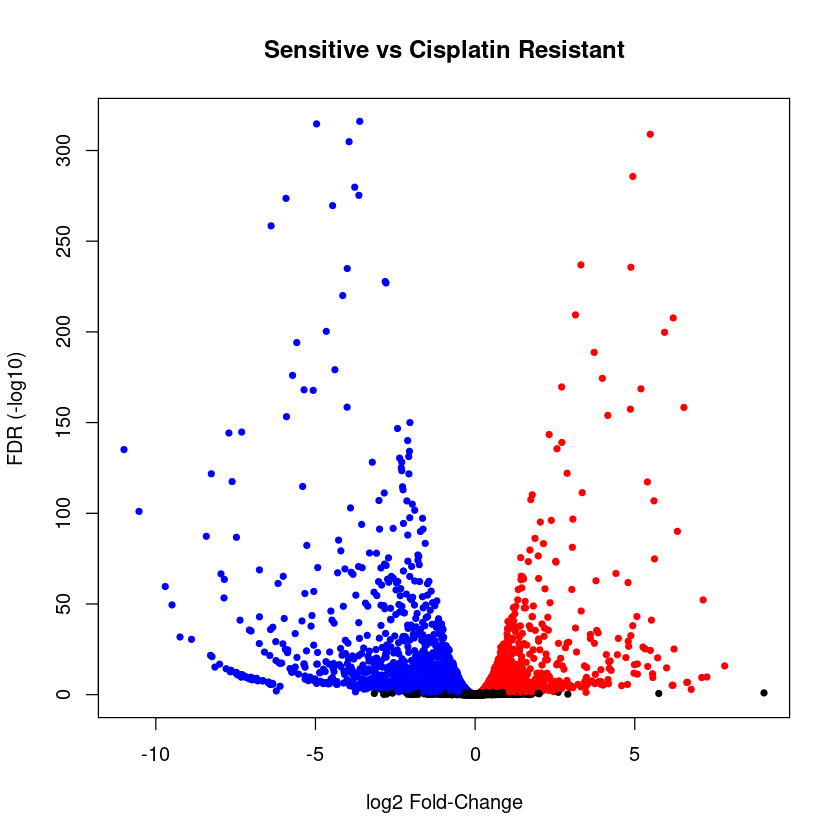

In [125]:
plot(resistant_tt_so$table$logFC, -log10(resistant_tt_so$table$FDR), 
     col=c("blue", "black", "red")[as.factor(resistant_tests_so)], ylab="FDR (-log10)", 
     xlab="log2 Fold-Change", main="Sensitive vs Cisplatin Resistant", pch=20)

plot(resistant_tt_htseq$table$logFC, -log10(resistant_tt_htseq$table$FDR), 
     col=c("blue", "black", "red")[as.factor(resistant_tests_htseq)], ylab="FDR (-log10)", 
     xlab="log2 Fold-Change", main="Sensitive vs Cisplatin Resistant", pch=20)

plot(resistant_tt_rsem$table$logFC, -log10(resistant_tt_rsem$table$FDR), 
     col=c("blue", "black", "red")[as.factor(resistant_tests_rsem)], ylab="FDR (-log10)", 
     xlab="log2 Fold-Change", main="Sensitive vs Cisplatin Resistant", pch=20)

### Corrplots 
Correlation plots can be used to demonstrate consistency between your replicates.  Here we will do them only using the data for the DEGs. 

In [126]:
degs_so <- rownames(resistant_tests_so)[resistant_tests_so != 0]
head(degs_so)

degs_htseq <- rownames(resistant_tests_htseq)[resistant_tests_htseq != 0]
head(degs_htseq)

degs_rsem <- rownames(resistant_tests_rsem)[resistant_tests_rsem != 0]
head(degs_rsem)

[1] "7SK"   "AAGAB" "AAK1"  "AAMDC" "AAMP"  "AARD"

[1] "ENSG00000000971" "ENSG00000001084" "ENSG00000001461" "ENSG00000001617"
[5] "ENSG00000002549" "ENSG00000002586"

[1] "ENSG00000001084" "ENSG00000001461" "ENSG00000002549" "ENSG00000002586"
[5] "ENSG00000002834" "ENSG00000003056"

We can plot the correlation matrix between each sample using the corrplot Package.

In [127]:
degs_zscores_so <- rpkm_zscores_so[degs_so, ]
colnames(degs_zscores_so) <- my_dge_so$samples$sample.label
head(degs_zscores_so)

degs_zscores_htseq <- rpkm_zscores_htseq[degs_htseq, ]
colnames(degs_zscores_htseq) <- my_dge_htseq$samples$sample.label
head(degs_zscores_htseq)

degs_zscores_rsem <- rpkm_zscores_rsem[degs_rsem, ]
colnames(degs_zscores_rsem) <- my_dge_rsem$samples$sample.label
head(degs_zscores_rsem)

,sensitive.1,sensitive.2,sensitive.3,resistant.1,resistant.2,resistant.3
7SK,1.2775315,1.2829678,-0.5822303,-0.6775153,-0.8477441,-0.4530096
AAGAB,1.4469380,0.7597044,0.3484043,-0.9963444,-0.7926838,-0.7660185
AAK1,0.9659099,1.1514823,0.3862140,-0.9306680,-1.2808046,-0.2921336
AAMDC,0.1529976,0.6117406,1.4369528,-0.5960320,-1.4711135,-0.1345455
AAMP,-0.7322853,-1.2247561,-0.7130729,1.0876140,0.8917494,0.6907508
AARD,0.8876661,0.8309645,1.0142452,-0.9418088,-0.8647980,-0.9262690


,sensitive.1,sensitive.2,sensitive.3,resistant.1,resistant.2,resistant.3
ENSG00000000971,1.5325205,0.6404662,0.2150373,-1.23876723,-0.5733653,-0.5758914
ENSG00000001084,-0.9165192,-0.9124438,-0.9053191,0.81729585,0.9934602,0.9235261
ENSG00000001461,1.6532338,0.6383695,-0.3765197,-0.06483632,-0.9536186,-0.8966287
ENSG00000001617,-0.1847414,1.3392992,1.1330099,-0.65344822,-0.5657938,-1.0683256
ENSG00000002549,-1.3722135,-0.2086385,-0.8219237,0.49477891,1.3619870,0.5460098
ENSG00000002586,-0.9747124,-0.6889647,-0.9234504,0.68285557,1.4228191,0.4814528


,sensitive.1,sensitive.2,sensitive.3,resistant.1,resistant.2,resistant.3
ENSG00000001084,-0.9225453,-0.9090988,-0.90346104,0.8271161,0.9846186,0.9233705
ENSG00000001461,1.7668317,0.4687479,-0.21412962,-0.2762123,-0.7904324,-0.9548053
ENSG00000002549,-1.3447369,-0.1941721,-0.93115501,0.6683782,1.2303613,0.5713245
ENSG00000002586,-0.9850024,-0.7580398,-0.87157891,0.6901055,1.3908430,0.5336726
ENSG00000002834,0.0802462,1.4761120,0.80499466,-0.3904253,-1.1751053,-0.7958222
ENSG00000003056,-1.4321565,-0.9461172,-0.02658771,0.5529140,1.0534780,0.7984694


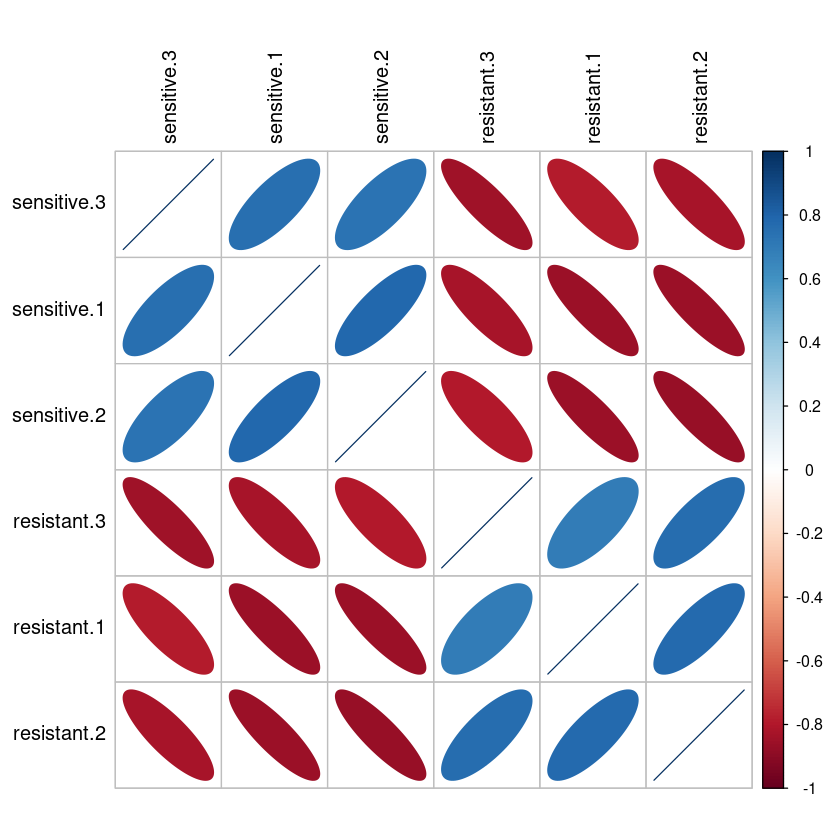

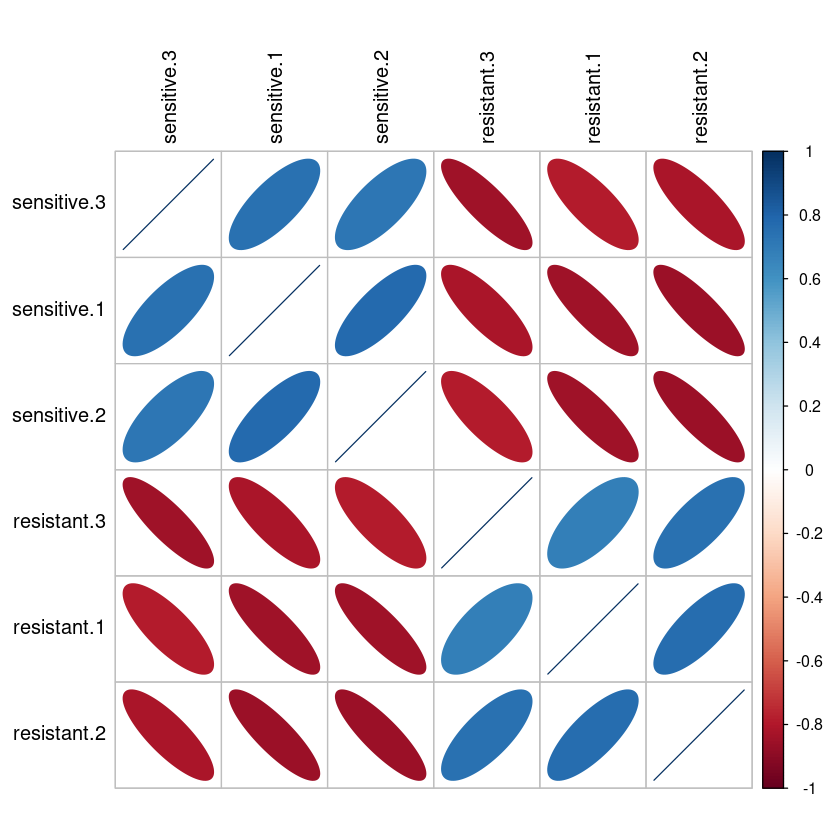

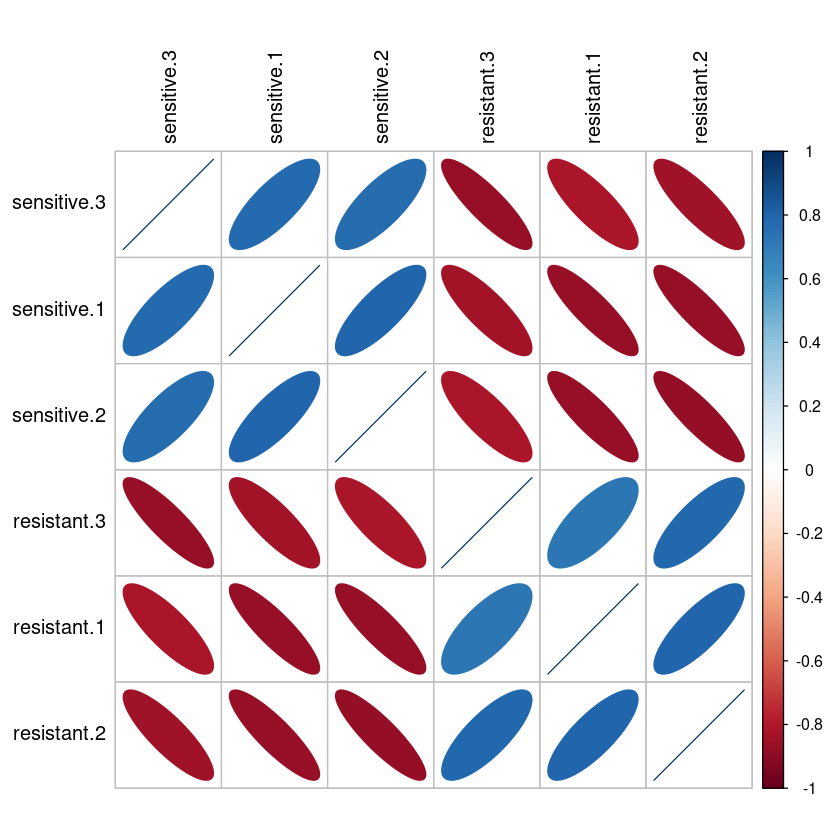

In [128]:
# library(corrplot)
my_cor_so <- cor(degs_zscores_so, method="pearson")
corrplot(my_cor_so, method="ellipse", order="hclust", hclust.method="average", tl.col="black")

my_cor_htseq <- cor(degs_zscores_htseq, method="pearson")
corrplot(my_cor_htseq, method="ellipse", order="hclust", hclust.method="average", tl.col="black")

my_cor_rsem <- cor(degs_zscores_rsem, method="pearson")
corrplot(my_cor_rsem, method="ellipse", order="hclust", hclust.method="average", tl.col="black")

### Heatmaps
We can further examine the consistency between biological replicates with a heat map for the DEGs.  There is an R package called **pheatmap** (pretty heatmaps) that take much of the work out of this task. 

In [129]:
library(pheatmap)

Make a topTable for only the DEGs, and sort it by increasing FDR.

In [130]:
dge_tt_so <- resistant_tt_so$table[degs_so, ]
dge_tt_so <- dge_tt_so[order(dge_tt_so$FDR, decreasing=FALSE), ]
head(dge_tt_so)

dge_tt_htseq <- resistant_tt_htseq$table[degs_htseq, ]
dge_tt_htseq <- dge_tt_htseq[order(dge_tt_htseq$FDR, decreasing=FALSE), ]
head(dge_tt_htseq)

dge_tt_rsem <- resistant_tt_rsem$table[degs_rsem, ]
dge_tt_rsem <- dge_tt_rsem[order(dge_tt_rsem$FDR, decreasing=FALSE), ]
head(dge_tt_rsem)

,logFC,logCPM,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>
APOE,-3.638556,6.905816,0,0
COL11A1,-4.844528,7.744362,0,0
COL16A1,5.721517,5.646690,0,0
DCN,3.228914,6.574249,0,0
DMD,-4.399884,6.265814,0,0
GCLC,4.172344,7.164205,0,0


,logFC,logCPM,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000001084,4.210881,7.727254,0,0
ENSG00000003436,-4.967644,5.895078,0,0
ENSG00000007372,-7.526298,5.530649,0,0
ENSG00000011465,3.289336,7.171179,0,0
ENSG00000060718,-4.801028,8.294971,0,0
ENSG00000084636,5.748469,6.160308,0,0


,logFC,logCPM,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000001084,4.228804,7.358741,0,0
ENSG00000060718,-4.799528,7.903192,0,0
ENSG00000084636,5.742915,5.813668,0,0
ENSG00000152661,-5.136234,6.932631,0,0
ENSG00000170396,4.767751,6.665005,0,0
ENSG00000182107,-5.395373,6.663586,0,0


Get the gene symbols for the top 50 DEGs to use as an index for the zscores.  Fifty is a reasonable number if you want to see the gene labels.

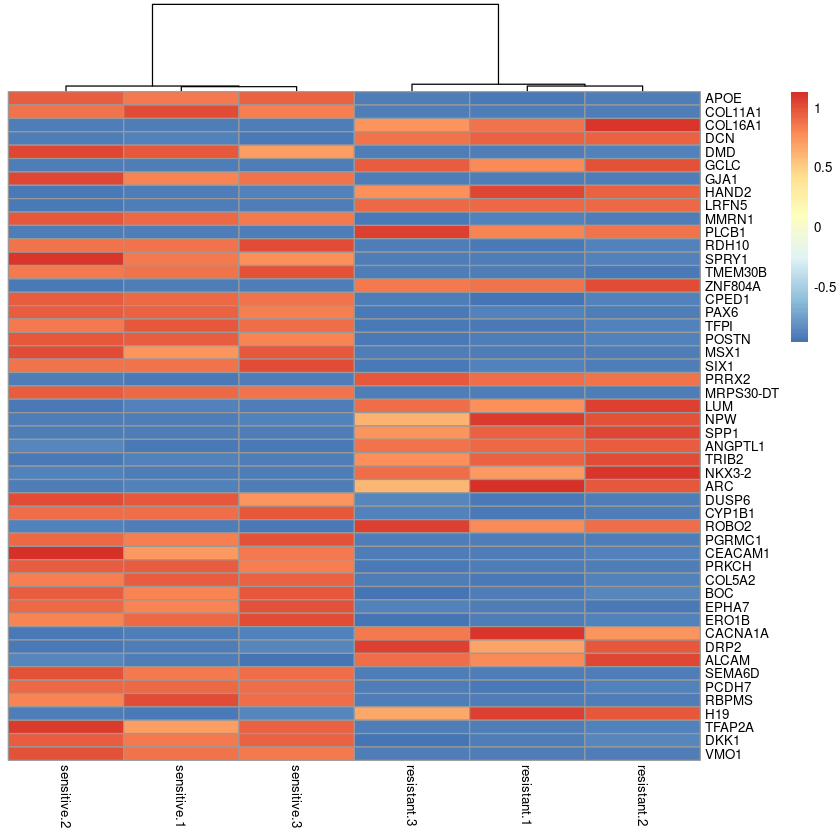

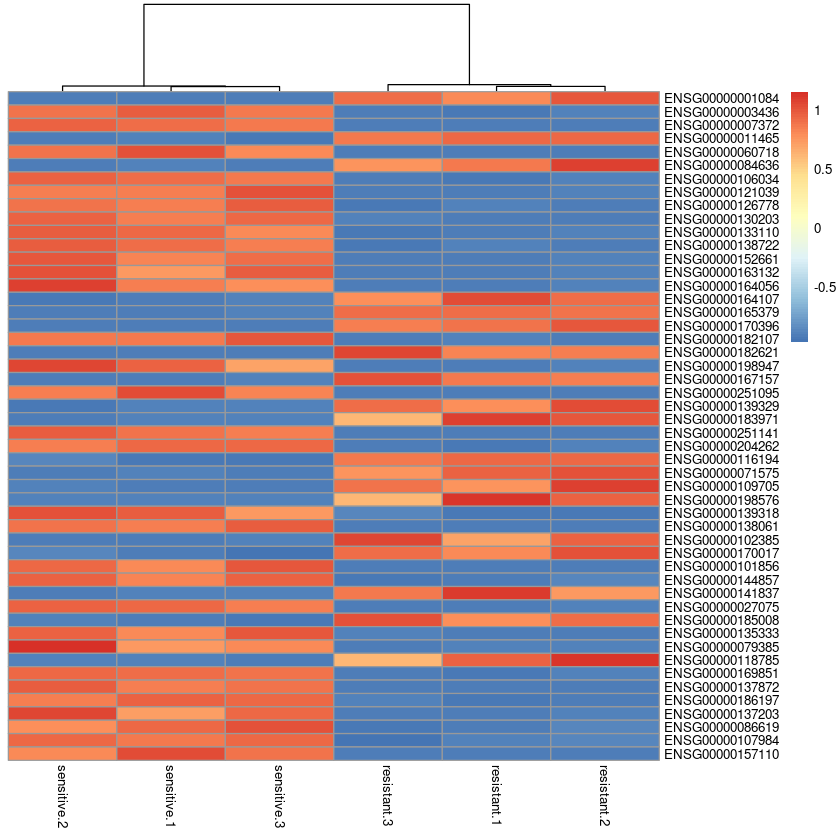

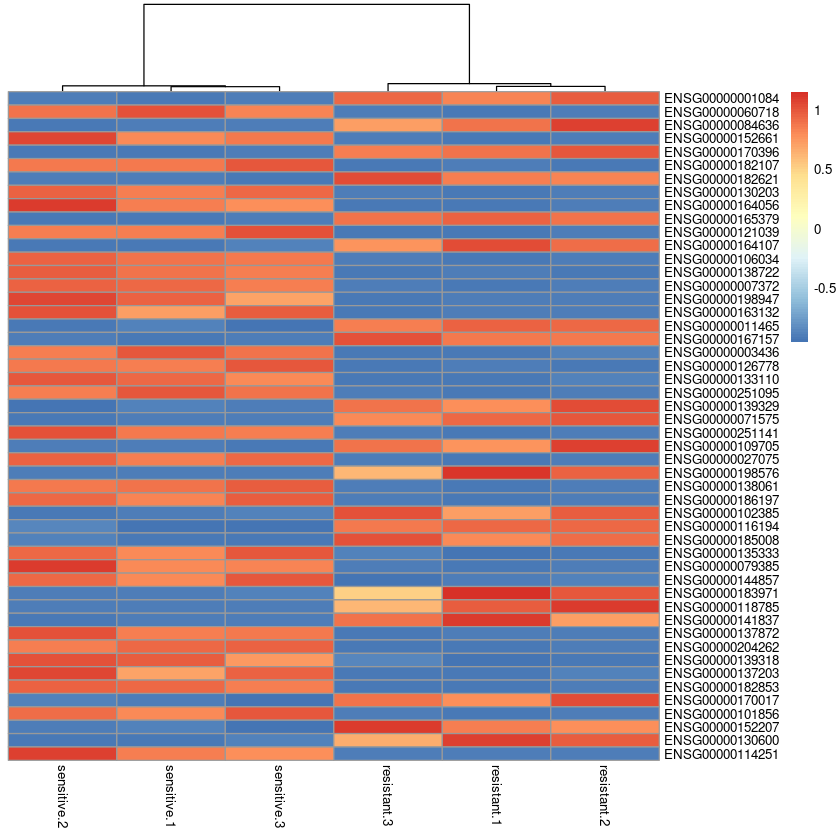

In [131]:
#gene_no_so <- 50
##my_top_so <- rownames(dge_tt_so)[1:gene_no_so]
#top_zscores_so <- rpkm_zscores_so[my_top_so, ]
#colnames(top_zscores_so) <- my_dge_so$samples$sample.label
#pheatmap(top_zscores_so, cluster_col=TRUE, cluster_rows=FALSE, clustering_distance_cols="euclidean", 
 #       cluster_method="average",fontsize=8)

#gene_no_htseq <- 50
#my_top_htseq <- rownames(dge_tt_htseq)[1:gene_no_htseq]
#top_zscores_htseq <- rpkm_zscores_htseq[my_top_htseq, ]
#colnames(top_zscores_htseq) <- my_dge_htseq$samples$sample.label
#pheatmap(top_zscores_htseq, cluster_col=TRUE, cluster_rows=FALSE, clustering_distance_cols="euclidean", 
#        cluster_method="average",fontsize=8)

gene_no_rsem <- 50
my_top_rsem <- rownames(dge_tt_rsem)[1:gene_no_rsem]
top_zscores_rsem <- rpkm_zscores_rsem[my_top_rsem, ]
colnames(top_zscores_rsem) <- my_dge_rsem$samples$sample.label
pheatmap(top_zscores_rsem, cluster_col=TRUE, cluster_rows=FALSE, clustering_distance_cols="euclidean", 
        cluster_method="average",fontsize=8)

The samples seem to be quite consistent.  There is little chance that samples were swapped.  Note, the gene list is sorted based on differential expression in the CRPC knockdown.  These genes will not necessarily be affected by the knockdown of others.

### Boxplots for Individual Genes

We can check the expression of the primary genes that stated by the authors to be associated with progression of CRPC. There is a large difference in expression level among the groups.

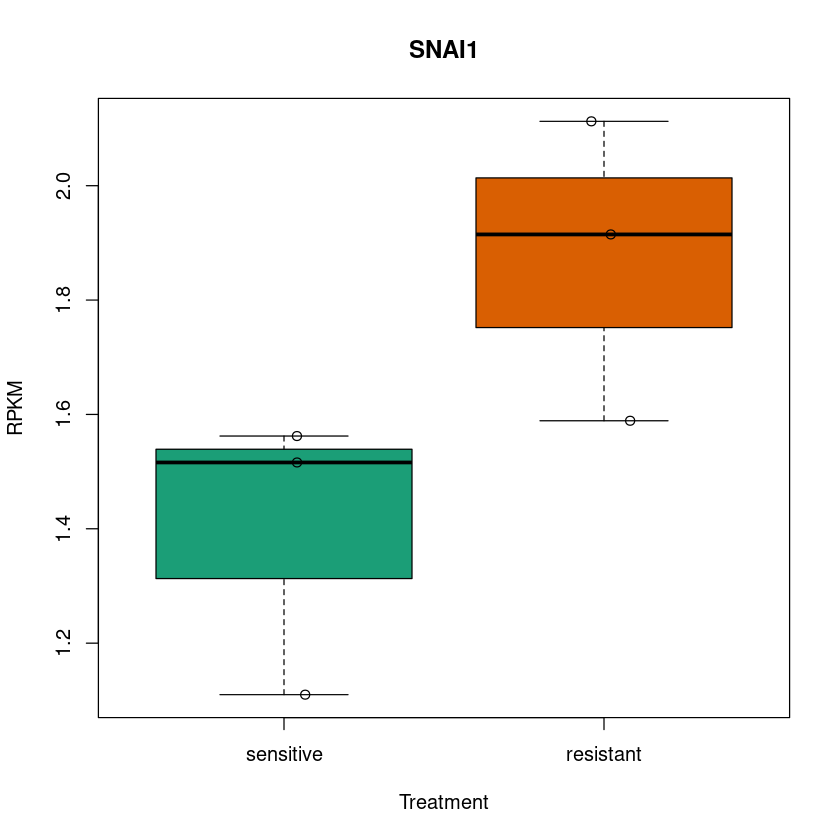

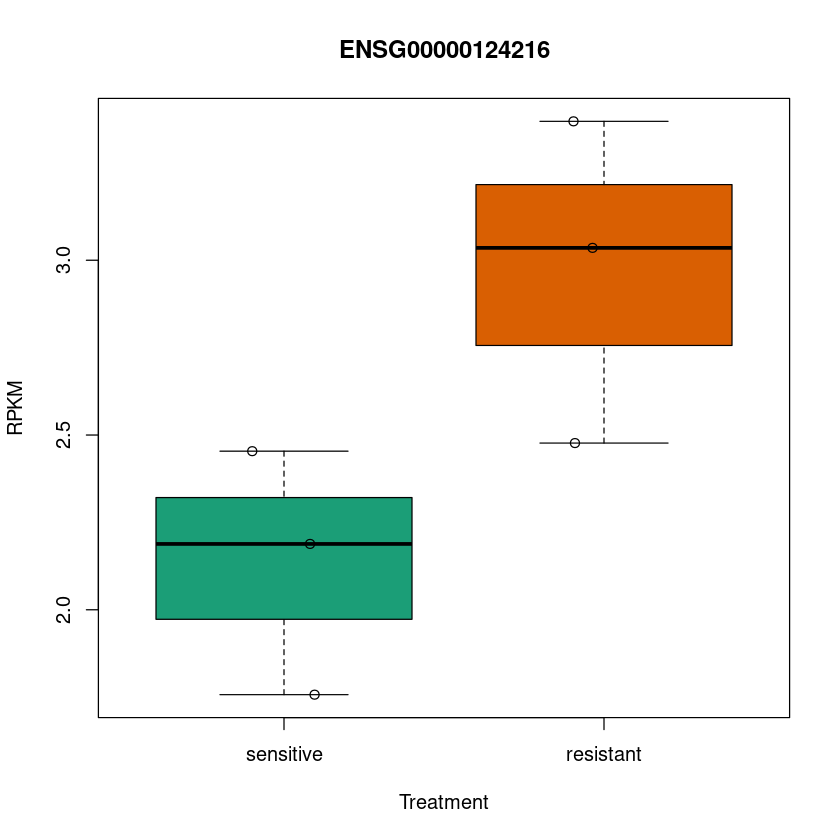

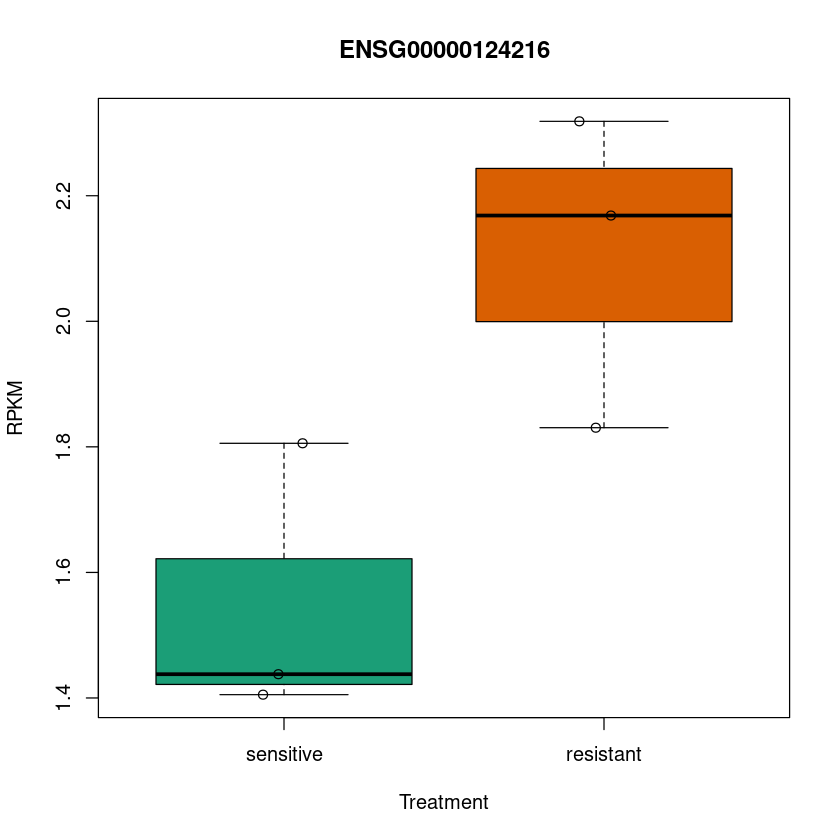

In [132]:
my_gene_so <- "SNAI1"
boxplot(rpkm_norm_so[my_gene_so, ] ~ my_dge_so$sample$group, col=group_pal_so, main=my_gene_so, ylab="RPKM", 
        xlab="Treatment")
stripchart(rpkm_norm_so[my_gene_so, ] ~ my_dge_so$sample$group, vertical=TRUE, method="jitter", jitter=0.1, 
          add=TRUE, pch=1)

my_gene_htseq <- "ENSG00000124216"
boxplot(rpkm_norm_htseq[my_gene_htseq, ] ~ my_dge_htseq$sample$group, col=group_pal_htseq, main=my_gene_htseq, ylab="RPKM", 
        xlab="Treatment")
stripchart(rpkm_norm_htseq[my_gene_htseq, ] ~ my_dge_htseq$sample$group, vertical=TRUE, method="jitter", jitter=0.1, 
          add=TRUE, pch=1)

my_gene_rsem <- "ENSG00000124216"
boxplot(rpkm_norm_rsem[my_gene_rsem, ] ~ my_dge_rsem$sample$group, col=group_pal_rsem, main=my_gene_rsem, ylab="RPKM", 
        xlab="Treatment")
stripchart(rpkm_norm_rsem[my_gene_rsem, ] ~ my_dge_rsem$sample$group, vertical=TRUE, method="jitter", jitter=0.1, 
          add=TRUE, pch=1)

ERROR: Error in rpkm_norm_rsem[my_gene, ]: subscript out of bounds


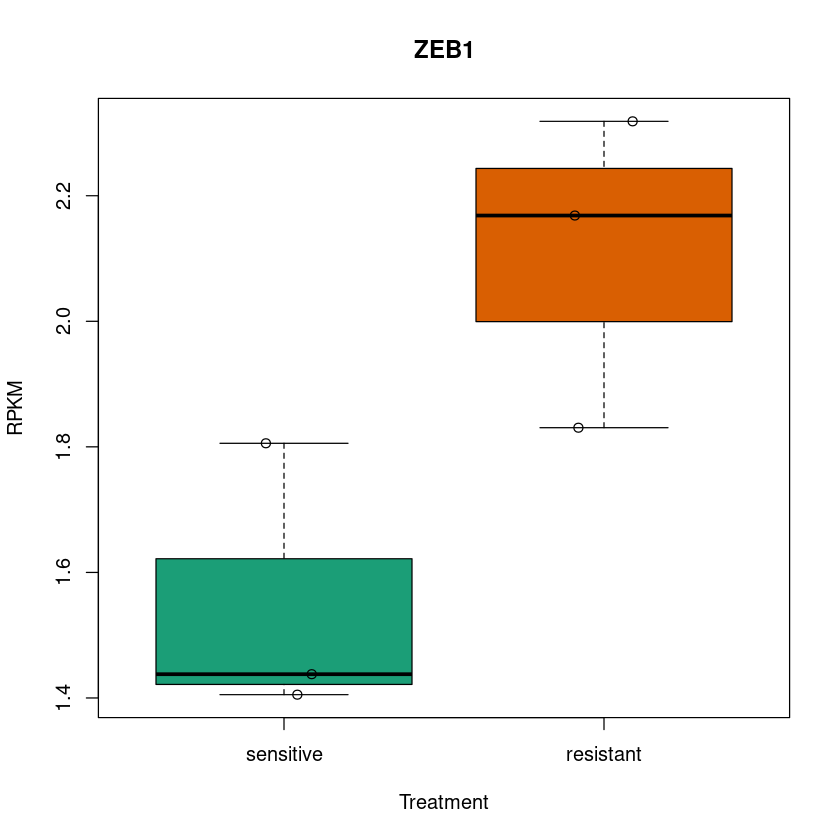

In [133]:
my_gene <- "ZEB1"
boxplot(rpkm_norm_rsem[my_gene_rsem , ] ~ my_dge_rsem$sample$group, col=group_pal_rsem, main=my_gene, ylab="RPKM", 
        xlab="Treatment")
stripchart(rpkm_norm_rsem[my_gene_rsem, ] ~ my_dge_rsem$sample$group, vertical=TRUE, method="jitter", jitter=0.1, 
          add=TRUE, pch=1)

my_gene <- "TWIST1"
boxplot(rpkm_norm_rsem[my_gene, ] ~ my_dge_rsem$sample$group, col=group_pal_rsem, main=my_gene, ylab="RPKM", 
        xlab="Treatment")
stripchart(rpkm_norm_rsem[my_gene, ] ~ my_dge_so$sample$group, vertical=TRUE, method="jitter", jitter=0.1, 
          add=TRUE, pch=1)

my_gene <- "SNAI2"
boxplot(rpkm_norm_rsem[my_gene, ] ~ my_dge_rsem$sample$group, col=group_pal_rsem, main=my_gene, ylab="RPKM", 
        xlab="Treatment")
stripchart(rpkm_norm_rsem[my_gene, ] ~ my_dge_rsem$sample$group, vertical=TRUE, method="jitter", jitter=0.1, 
          add=TRUE, pch=1)

my_gene <- "ZEB2"
boxplot(rpkm_norm_rsem[my_gene, ] ~ my_dge_rsem$sample$group, col=group_pal_rsem, main=my_gene, ylab="RPKM", 
        xlab="Treatment")
stripchart(rpkm_norm_rsem[my_gene, ] ~ my_dge_rsem$sample$group, vertical=TRUE, method="jitter", jitter=0.1, 
          add=TRUE, pch=1)


[Yun, et al., Oncotarget., 2017](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5777737/) claimed that 12 genes are associated with progression into CRPC, we can visualize these genes in a heatmap.

To avoid data entry error, I copy and pasted the gene list into my R code.  However, I need to convert this long **character string** to a **character vector** of gene symbols, removing the commas in the process.   If you ever attempt something similar, watch for hidden formatting characters such as **tabs** or **end-of-line**.

In [ ]:
emt_up <- "ZEB2,ZEB1,SNAI1,SNAI2,TWIST1,MMP1,VIM,SOX2,OCT4,NANOG,CDH2"
emt_up <- c(strsplit(emt_up, split=", ")[[1]], recursive=TRUE)
print(emt_up)

Same for the putative down-regulated genes.  

In [ ]:
emt_down <- "CDH1,KRT19,KRT7"
emt_down <- c(strsplit(emt_down, split=", ")[[1]], recursive=TRUE)
emt_down

Now, we need to select only those genes that we have been able to examine in the RNA-seq experiment, i.e. we need to remove genes that were filtered.  

In [ ]:
emt_up <- intersect(emt_up, rownames(rpkm_zscores))
emt_down <- intersect(emt_down, rownames(rpkm_zscores))

In [ ]:
emt_all <- union(emt_up, emt_down)
emt_zscores <- rpkm_zscores[emt_all, ]
colnames(emt_zscores) <- my_dge$samples$sample.label
pheatmap(emt_zscores, cluster_col=TRUE, cluster_rows=TRUE, clustering_distance_cols="euclidean", 
        cluster_method="average")

# Saving the Results

A critical step of bioinformatics analysis is to carefully document all steps.  This task is often ignored and publications frequently have inadequate documentation of data processing and analysis.  This is one advantage of tools like Jupyter Notebooks or Rmarkdown (not covered in this course).  The workflow from the RNA-seq Notebooks should be saved downloaded in at least two formats, HTML and R are recommended.  

In addition, we will save the result to a tab-delimited text file that can be imported into Microsoft Excel or LibreOffice Calc.  First, let's assemble the **edgeR** results in a single file.  

In [134]:
#library(data.table)
resistant_results_so <- resistant_tt_so$table
resistant_results_so$test <- as.vector(resistant_tests_so)
resistant_results_so$SYMBOL <- rownames(resistant_results_so)
head(resistant_results_so)

resistant_results_htseq <- resistant_tt_htseq$table
resistant_results_htseq$test <- as.vector(resistant_tests_htseq)
resistant_results_htseq$SYMBOL <- rownames(resistant_results_htseq)
head(resistant_results_htseq)

resistant_results_rsem <- resistant_tt_rsem$table
resistant_results_rsem$test <- as.vector(resistant_tests_rsem)
resistant_results_rsem$SYMBOL <- rownames(resistant_results_rsem)
head(resistant_results_rsem)

,logFC,logCPM,PValue,FDR,test,SYMBOL
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
5_8S_rRNA,0.2548072,12.7181685,0.403422060,0.56113103,0,5_8S_rRNA
7SK,-0.7920842,3.5889508,0.007473883,0.02350881,-1,7SK
A1BG-AS1,-0.4121265,1.8369782,0.075745237,0.15935734,0,A1BG-AS1
A2M-AS1,-0.3356417,0.6015812,0.383684526,0.54192203,0,A2M-AS1
AAAS,-0.1121233,5.2618811,0.305384721,0.46107278,0,AAAS
AACS,-0.1846183,3.7002293,0.163367031,0.28820081,0,AACS


,logFC,logCPM,PValue,FDR,test,SYMBOL
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
ENSG00000000003,-0.34526493,2.461512,1.006452e-01,1.860351e-01,0,ENSG00000000003
ENSG00000000419,-0.14095330,5.781829,9.692776e-02,1.806364e-01,0,ENSG00000000419
ENSG00000000457,0.01238648,3.790078,1.000000e+00,1.000000e+00,0,ENSG00000000457
ENSG00000000460,0.02536229,3.971185,9.758879e-01,1.000000e+00,0,ENSG00000000460
ENSG00000000971,-0.33682791,7.665716,1.697575e-06,1.022165e-05,-1,ENSG00000000971
ENSG00000001084,4.21088140,7.727254,0.000000e+00,0.000000e+00,1,ENSG00000001084


,logFC,logCPM,PValue,FDR,test,SYMBOL
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
ENSG00000000003,-0.32903452,2.036873,0.2089925,0.3623900,0,ENSG00000000003
ENSG00000000419,-0.10244537,5.395727,0.2884322,0.4563751,0,ENSG00000000419
ENSG00000000457,-0.02179368,3.576523,0.9077657,0.9650969,0,ENSG00000000457
ENSG00000000460,-0.05257911,3.542651,0.7123860,0.8353703,0,ENSG00000000460
ENSG00000000971,0.10923246,9.807134,0.1432649,0.2726216,0,ENSG00000000971
ENSG00000001084,4.22880404,7.358741,0.0000000,0.0000000,1,ENSG00000001084


## Gene Annotations

We have the **edgeR** results for our genes, but we only have the gene symbol.  It may be helpful to other gene identifiers.  We could use a **Bioconductor** database as we did previously.  This time, we are going to use a file from [Human Genome Nomenclature Committee website](https://www.genenames.org/cgi-bin/download).  

In [135]:
hgnc_genes <- read.delim("/home/x-tsuzuki/bigcare/ref_files/HGNC_genes.txt", sep="\t", as.is=TRUE, header=TRUE)
head(hgnc_genes)

,HGNC.ID,Approved.Symbol,Approved.Name,Status,Previous.Symbols,Synonyms,Chromosome,Accession.Numbers,RefSeq.IDs,Ensembl.ID,Alias.Names,Ensembl.Gene.ID,NCBI.ID
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,HGNC:5,A1BG,alpha-1-B glycoprotein,Approved,,,19q13.43,,NM_130786,ENSG00000121410,,ENSG00000121410,1
2,HGNC:37133,A1BG-AS1,A1BG antisense RNA 1,Approved,"NCRNA00181, A1BGAS, A1BG-AS",FLJ23569,19q13.43,BC040926,NR_015380,ENSG00000268895,,ENSG00000268895,503538
3,HGNC:24086,A1CF,APOBEC1 complementation factor,Approved,,"ACF, ASP, ACF64, ACF65, APOBEC1CF",10q11.23,AF271790,NM_014576,ENSG00000148584,,ENSG00000148584,29974
4,HGNC:6,A1S9T,"symbol withdrawn, see [HGNC:12469](/data/gene-symbol-report/#!/hgnc_id/HGNC:12469)",Symbol Withdrawn,,,,,,,,,NA
5,HGNC:7,A2M,alpha-2-macroglobulin,Approved,,"FWP007, S863-7, CPAMD5",12p13.31,"BX647329, X68728, M11313",NM_000014,ENSG00000175899,,ENSG00000175899,2
6,HGNC:27057,A2M-AS1,A2M antisense RNA 1,Approved,,,12p13.31,,NR_026971,ENSG00000245105,,ENSG00000245105,144571


Let's see if we can map the symbols in our results to **Approved.Symbol**.  

In [136]:
table(resistant_results_so$SYMBOL %in% hgnc_genes$Approved.Symbol)

table(resistant_results_htseq$SYMBOL %in% hgnc_genes$Ensembl.ID)

table(resistant_results_rsem$SYMBOL %in% hgnc_genes$Ensembl.ID)


FALSE  TRUE 
   61 15638 


FALSE  TRUE 
 1340 13623 


FALSE  TRUE 
 2159 14326 

Seems like we are OK for most of our symbols.  This does raise a concern though.  We cannot be sure that we have the current HGNC approved symbol.  Therefore, we need to search all possible fields in this file, **Approved.Symbol**, **Previous.Symbols** and **Synonyms**.  We can use **grep** for this, but we need to be careful.  

We cannot search with exact matching because there can be multiple symbols in each column.  A simple pattern search with **grep** will also be a problem because of partial matches.  To control for this, we need to use an actual **regular expression** to allow for only specific characters after our gene symbol.

For example, *C6orf1* will produce a partial match to any columns that contain this character string such as *C6orf12* or *C6orf100*.  We cannot force an exact match because there could be more than one **Previous.Symbol**, so we need to allow for possibilities like *C6orf1,XXX* or *XXX,C6orf1* where *XXX* is another **Previous.Symbol**.  

To do this, we are going to add two possibilities to the end of the symbol pattern.  First, we want no characters to precede or follow the gene symbol, i.e. it is the only symbol in the column.  We can indicate the start of the string with a carat, `^`, and the end of a string with a dollar sign, `$`, in our pattern.  Second, we will allow for a comma that is used to separate multiple symbols.  So, for any pattern, `XXX`, we will allow the following.
* `^XXX$` -- *C6orf1*
* `^XXX,` -- *C6orf1,* 
* `,XXX$` -- *,C6orf1*
* `,XXX,` -- *,C6orf1,*

We are also going to allow for leading or trailing spaces.  The R coding for these steps are complicated.  Do not worry about that.  The important point here is that it can be difficult to pull textual data from files or databases, especially when there are inconsistencies in data entry.  Many web tools do this for you.  However, I have always had concerns about accuracy.  

Dealing with gene identifiers is always frustrating.  This time, it is a bit more complicated because we are dealing with an earlier version of the human genome.

Please Note, the steps below are slow and will take about two minutes.  

In [137]:
approved <- lapply(resistant_results_so$SYMBOL, function(x)(grepl(paste("(^|,| +)", x, "($|,| +)", sep=""), hgnc_genes$Approved.Symbol, fixed=FALSE)))
names(approved) <- resistant_results_so$SYMBOL

Each element of **approved** is a **logical vector** that we sum to determine the number of hits.  

In [138]:
table(sapply(approved, sum))


    0     1     2 
   61 15629     9 

The number doesn't change. So we had over 17,000 hits and each is unique.  Now we can reformat the data. The column **Result.Symbol** is added in the process.  This is the symbol that we used in the gene count matrix.  

In [139]:
approved_data_so <- lapply(approved, function(x)(hgnc_genes[x, ]))
approved_data_so <- do.call(rbind, approved_data_so)
approved_data_so$Result.Symbol <- rownames(approved_data_so)
head(approved_data_so)

,HGNC.ID,Approved.Symbol,Approved.Name,Status,Previous.Symbols,Synonyms,Chromosome,Accession.Numbers,RefSeq.IDs,Ensembl.ID,Alias.Names,Ensembl.Gene.ID,NCBI.ID,Result.Symbol
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
A1BG-AS1,HGNC:37133,A1BG-AS1,A1BG antisense RNA 1,Approved,"NCRNA00181, A1BGAS, A1BG-AS",FLJ23569,19q13.43,BC040926,NR_015380,ENSG00000268895,,ENSG00000268895,503538,A1BG-AS1
A2M-AS1,HGNC:27057,A2M-AS1,A2M antisense RNA 1,Approved,,,12p13.31,,NR_026971,ENSG00000245105,,ENSG00000245105,144571,A2M-AS1
AAAS,HGNC:13666,AAAS,aladin WD repeat nucleoporin,Approved,,,12q13.13,AJ289841,,ENSG00000094914,"aladin, Allgrove, triple-A, adracalin",ENSG00000094914,8086,AAAS
AACS,HGNC:21298,AACS,acetoacetyl-CoA synthetase,Approved,,"FLJ12389, SUR-5, ACSF1",12q24.31,AK022451,NM_023928,ENSG00000081760,acyl-CoA synthetase family member 1,ENSG00000081760,65985,AACS
AADAT,HGNC:17929,AADAT,aminoadipate aminotransferase,Approved,,"KATII, KAT2, KYAT2",4q33,AF097994,NM_016228,ENSG00000109576,"kynurenine aminotransferase II, L kynurenine/alpha aminoadipate aminotransferase",ENSG00000109576,51166,AADAT
AAGAB,HGNC:25662,AAGAB,alpha and gamma adaptin binding protein,Approved,,"FLJ11506, p34",15q23,AL136715,NM_024666,ENSG00000103591,,ENSG00000103591,79719,AAGAB


Now we can search **Previous.Symbol**. This step is slow and takes about 2 minutes. 

In [140]:
previous_sym <- lapply(resistant_results_so$SYMBOL, function(x)(grepl(paste("(^|,| +)", x, "($|,| +)", sep=""), hgnc_genes$Previous.Symbols, fixed=FALSE)))
names(previous_sym) <- resistant_results_so$SYMBOL

In [141]:
table(sapply(previous_sym, sum))


    0     1     2     3 
15587   109     2     1 

We have two genes with more than one hit.   

In [142]:
which(sapply(previous_sym, sum)  > 1)

NET1  PLD1 TRNP1 
 8040  9216 14177

In [143]:
previous_data <- lapply(previous_sym, function(x)(hgnc_genes[x, ]))
previous_data <- do.call(rbind, previous_data)
previous_data$Result.Symbol <- rownames(previous_data)

In [144]:
head(previous_data)

,HGNC.ID,Approved.Symbol,Approved.Name,Status,Previous.Symbols,Synonyms,Chromosome,Accession.Numbers,RefSeq.IDs,Ensembl.ID,Alias.Names,Ensembl.Gene.ID,NCBI.ID,Result.Symbol
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
ADCY3,HGNC:239,ADCY8,adenylate cyclase 8,Approved,ADCY3,"HBAC1, AC8",8q24.22,Z35309,,ENSG00000155897,,ENSG00000155897,114,ADCY3
AK3,HGNC:363,AK4,adenylate kinase 4,Approved,"AK3, AK3L1",,1p31.3,AK025926,NM_013410,ENSG00000162433,,ENSG00000162433,205,AK3
AK6,HGNC:17376,AK3,adenylate kinase 3,Approved,"AK6, AK3L1",AKL3L1,9p24.1,BC013771,NM_016282,ENSG00000147853,,ENSG00000147853,50808,AK6
ANP32C,HGNC:16675,ANP32CP,"acidic nuclear phosphoprotein 32 family member C, pseudogene",Approved,ANP32C,PP32R1,4q32.3,AF008216,NG_074974.,ENSG00000248546,,ENSG00000248546,23520,ANP32C
APPL1,HGNC:623,APPL,amyloid beta (A4) precursor protein-like,Entry Withdrawn,APPL1,,9q31-qter,,,,,,NA,APPL1
APPL2,HGNC:598,APLP2,amyloid beta precursor like protein 2,Approved,APPL2,APPH,11q24.3,L19597,NM_001642,ENSG00000084234,,ENSG00000084234,334,APPL2


Now, search the **Synonyms** column. This step also takes about 2 minutes.

In [145]:
synonym <- lapply(resistant_results_so$SYMBOL, function(x)(grepl(paste("(^|,| +)", x, "($|,| +)", sep=""), hgnc_genes$Synonyms, fixed=FALSE)))
names(synonym) <- resistant_results_so$SYMBOL

In [146]:
which(sapply(synonym, sum) > 1)

APC2   ATR  BAP1   CAD  CAP2  CAST  CHD5   DAP   DBP   EBP   FAH  FHL1  GOT1 
  622  1017  1098  1548  1592  1637  2125  2771  2791  3324  3843  4150  4747 
  HGF   HK1   HK2  IMP3   MBP   ME2   MIF  MTF1  NET1  PAN2  POP1  PTH2  RAD1 
 5170  5207  5208  5729  6947  7001  7177  7578  8040  8667  9417  9904 10109 
 RIF1   RP2  SCP2   SMS    U1    U2    U3    U6 
10454 10860 11905 12616 14390 14391 14396 14397

In [147]:
synonym_data <- lapply(synonym, function(x)(hgnc_genes[x, ]))
synonym_data <- do.call(rbind, synonym_data)
synonym_data$Result.Symbol <- rownames(synonym_data)
head(synonym_data)

,HGNC.ID,Approved.Symbol,Approved.Name,Status,Previous.Symbols,Synonyms,Chromosome,Accession.Numbers,RefSeq.IDs,Ensembl.ID,Alias.Names,Ensembl.Gene.ID,NCBI.ID,Result.Symbol
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
7SK,HGNC:10037,RN7SK,RNA component of 7SK nuclear ribonucleoprotein,Approved,,7SK,6p12.2,"X05490, X04236",NR_001445,ENSG00000283293,,ENSG00000283293,125050,7SK
ACAT1,HGNC:11177,SOAT1,sterol O-acyltransferase 1,Approved,"SOAT, STAT","ACAT, ACAT1",1q25.2,L21934,NM_003101,ENSG00000057252,acyl-Coenzyme A: cholesterol acyltransferase,ENSG00000057252,6646,ACAT1
ACAT2,HGNC:11178,SOAT2,sterol O-acyltransferase 2,Approved,,ACAT2,12q13.13,AF059203,,ENSG00000167780,acyl-Coenzyme A: cholesterol acyltransferase 2,ENSG00000167780,8435,ACAT2
ACP1,HGNC:7694,NDUFAB1,NADH:ubiquinone oxidoreductase subunit AB1,Approved,,"SDAP, FASN2A, ACP, ACP1",16p12.2,AF087660,NM_005003,ENSG00000004779,"acyl carrier protein, mitochondrial, complex I SDAP subunit",ENSG00000004779,4706,ACP1
ACTBP2,HGNC:141,ACTBP8,ACTB pseudogene 8,Approved,,ACTBP2,6q15,V00481,NG_000840,ENSG00000220267,,ENSG00000220267,68,ACTBP2
AIP,HGNC:24114,AURKAIP1,aurora kinase A interacting protein 1,Approved,,"AKIP, AIP, FLJ20608",1p36.33,,NM_017900,ENSG00000175756,,ENSG00000175756,54998,AIP


Now we can combine the data.  

In [148]:
all_genes <- rbind(approved_data_so, previous_data, synonym_data)
all_genes <- all_genes[order(all_genes$Result.Symbol), ]
rownames(all_genes) <- NULL
head(all_genes)

,HGNC.ID,Approved.Symbol,Approved.Name,Status,Previous.Symbols,Synonyms,Chromosome,Accession.Numbers,RefSeq.IDs,Ensembl.ID,Alias.Names,Ensembl.Gene.ID,NCBI.ID,Result.Symbol
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,HGNC:10037,RN7SK,RNA component of 7SK nuclear ribonucleoprotein,Approved,,7SK,6p12.2,"X05490, X04236",NR_001445,ENSG00000283293,,ENSG00000283293,125050,7SK
2,HGNC:37133,A1BG-AS1,A1BG antisense RNA 1,Approved,"NCRNA00181, A1BGAS, A1BG-AS",FLJ23569,19q13.43,BC040926,NR_015380,ENSG00000268895,,ENSG00000268895,503538,A1BG-AS1
3,HGNC:27057,A2M-AS1,A2M antisense RNA 1,Approved,,,12p13.31,,NR_026971,ENSG00000245105,,ENSG00000245105,144571,A2M-AS1
4,HGNC:13666,AAAS,aladin WD repeat nucleoporin,Approved,,,12q13.13,AJ289841,,ENSG00000094914,"aladin, Allgrove, triple-A, adracalin",ENSG00000094914,8086,AAAS
5,HGNC:21298,AACS,acetoacetyl-CoA synthetase,Approved,,"FLJ12389, SUR-5, ACSF1",12q24.31,AK022451,NM_023928,ENSG00000081760,acyl-CoA synthetase family member 1,ENSG00000081760,65985,AACS
6,HGNC:17929,AADAT,aminoadipate aminotransferase,Approved,,"KATII, KAT2, KYAT2",4q33,AF097994,NM_016228,ENSG00000109576,"kynurenine aminotransferase II, L kynurenine/alpha aminoadipate aminotransferase",ENSG00000109576,51166,AADAT


We can flag the duplicated genes.  

In [149]:
all_genes$Duplicated <- duplicated(all_genes$Result.Symbol, fromLast=FALSE) | duplicated(all_genes$Result.Symbol, fromLast=TRUE)
table(all_genes$Duplicated)


FALSE  TRUE 
15491   583 

In [150]:
all_genes[all_genes$Duplicated, ]

,HGNC.ID,Approved.Symbol,Approved.Name,Status,Previous.Symbols,Synonyms,Chromosome,Accession.Numbers,RefSeq.IDs,Ensembl.ID,Alias.Names,Ensembl.Gene.ID,NCBI.ID,Result.Symbol,Duplicated
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<lgl>
112,HGNC:93,ACAT1,acetyl-CoA acetyltransferase 1,Approved,ACAT,THIL,11q22.3,D90228,NM_000019,ENSG00000075239,acetoacetyl Coenzyme A thiolase,ENSG00000075239,38,ACAT1,TRUE
113,HGNC:11177,SOAT1,sterol O-acyltransferase 1,Approved,"SOAT, STAT","ACAT, ACAT1",1q25.2,L21934,NM_003101,ENSG00000057252,acyl-Coenzyme A: cholesterol acyltransferase,ENSG00000057252,6646,ACAT1,TRUE
114,HGNC:94,ACAT2,acetyl-CoA acetyltransferase 2,Approved,,,6q25.3,AF356877,NM_005891,ENSG00000120437,"acetoacetyl Coenzyme A thiolase, Acetyl-CoA acetyltransferase, cytosolic",ENSG00000120437,39,ACAT2,TRUE
115,HGNC:11178,SOAT2,sterol O-acyltransferase 2,Approved,,ACAT2,12q13.13,AF059203,,ENSG00000167780,acyl-Coenzyme A: cholesterol acyltransferase 2,ENSG00000167780,8435,ACAT2,TRUE
139,HGNC:122,ACP1,acid phosphatase 1,Approved,,"HAAP, LMW-PTP, LMWPTP",2p25.3,M87546,NM_004300,ENSG00000143727,"acid phosphatase of erythrocyte, low molecular weight phosphotyrosine protein phosphatase, red cell acid phosphatase",ENSG00000143727,52,ACP1,TRUE
140,HGNC:7694,NDUFAB1,NADH:ubiquinone oxidoreductase subunit AB1,Approved,,"SDAP, FASN2A, ACP, ACP1",16p12.2,AF087660,NM_005003,ENSG00000004779,"acyl carrier protein, mitochondrial, complex I SDAP subunit",ENSG00000004779,4706,ACP1,TRUE
157,HGNC:135,ACTBP2,ACTB pseudogene 2,Approved,,,5q14.1,,NG_003019,ENSG00000213763,,ENSG00000213763,62,ACTBP2,TRUE
158,HGNC:141,ACTBP8,ACTB pseudogene 8,Approved,,ACTBP2,6q15,V00481,NG_000840,ENSG00000220267,,ENSG00000220267,68,ACTBP2,TRUE
239,HGNC:234,ADCY3,adenylate cyclase 3,Approved,,AC3,2p23.3,AF033861,,ENSG00000138031,,ENSG00000138031,109,ADCY3,TRUE


One way to distinguish genes with multiple annotations is by chromosome.  We can add this to **crpc_results**.  

In [151]:
load("./data/GenesByExons.RData")
gene_chr_so <- unlist(runValue(seqnames(genesByExon_gr)))
gene_chr_so <- gene_chr_so[resistant_results_so$SYMBOL]
head(gene_chr_so)

load("./data/GenesByExons_ensembl.RData")
gene_chr_htseq <- unlist(runValue(seqnames(genesByExon_gr_ensembl)))
gene_chr_htseq <- gene_chr_htseq[resistant_results_htseq$SYMBOL]
head(gene_chr_htseq)

load("./data/GenesByExons_ensembl.RData")
gene_chr_rsem <- unlist(runValue(seqnames(genesByExon_gr_ensembl)))
gene_chr_rsem <- gene_chr_rsem[resistant_results_rsem$SYMBOL]
head(gene_chr_rsem)

5_8S_rRNA       7SK  A1BG-AS1   A2M-AS1      AAAS      AACS 
       14         1        19        12        12        12 
47 Levels: 1 2 3 4 5 6 7 X 8 9 11 10 12 13 14 15 16 17 18 20 19 Y 22 21 ... KI270713.1

ENSG00000000003 ENSG00000000419 ENSG00000000457 ENSG00000000460 ENSG00000000971 
              X              20               1               1               1 
ENSG00000001084 
              6 
47 Levels: 1 2 3 4 5 6 7 X 8 9 11 10 12 13 14 15 16 17 18 20 19 Y 22 21 ... KI270713.1

ENSG00000000003 ENSG00000000419 ENSG00000000457 ENSG00000000460 ENSG00000000971 
              X              20               1               1               1 
ENSG00000001084 
              6 
47 Levels: 1 2 3 4 5 6 7 X 8 9 11 10 12 13 14 15 16 17 18 20 19 Y 22 21 ... KI270713.1

In [152]:
resistant_results_so$gene_chr_so <- gene_chr_so
head(resistant_results_so)

resistant_results_htseq$gene_chr_htseq <- gene_chr_htseq
head(resistant_results_htseq)

resistant_results_rsem$gene_chr_rsem <- gene_chr_rsem
head(resistant_results_rsem)

,logFC,logCPM,PValue,FDR,test,SYMBOL,gene_chr_so
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<fct>
5_8S_rRNA,0.2548072,12.7181685,0.403422060,0.56113103,0,5_8S_rRNA,14
7SK,-0.7920842,3.5889508,0.007473883,0.02350881,-1,7SK,1
A1BG-AS1,-0.4121265,1.8369782,0.075745237,0.15935734,0,A1BG-AS1,19
A2M-AS1,-0.3356417,0.6015812,0.383684526,0.54192203,0,A2M-AS1,12
AAAS,-0.1121233,5.2618811,0.305384721,0.46107278,0,AAAS,12
AACS,-0.1846183,3.7002293,0.163367031,0.28820081,0,AACS,12


,logFC,logCPM,PValue,FDR,test,SYMBOL,gene_chr_htseq
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<fct>
ENSG00000000003,-0.34526493,2.461512,1.006452e-01,1.860351e-01,0,ENSG00000000003,X
ENSG00000000419,-0.14095330,5.781829,9.692776e-02,1.806364e-01,0,ENSG00000000419,20
ENSG00000000457,0.01238648,3.790078,1.000000e+00,1.000000e+00,0,ENSG00000000457,1
ENSG00000000460,0.02536229,3.971185,9.758879e-01,1.000000e+00,0,ENSG00000000460,1
ENSG00000000971,-0.33682791,7.665716,1.697575e-06,1.022165e-05,-1,ENSG00000000971,1
ENSG00000001084,4.21088140,7.727254,0.000000e+00,0.000000e+00,1,ENSG00000001084,6


,logFC,logCPM,PValue,FDR,test,SYMBOL,gene_chr_rsem
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<fct>
ENSG00000000003,-0.32903452,2.036873,0.2089925,0.3623900,0,ENSG00000000003,X
ENSG00000000419,-0.10244537,5.395727,0.2884322,0.4563751,0,ENSG00000000419,20
ENSG00000000457,-0.02179368,3.576523,0.9077657,0.9650969,0,ENSG00000000457,1
ENSG00000000460,-0.05257911,3.542651,0.7123860,0.8353703,0,ENSG00000000460,1
ENSG00000000971,0.10923246,9.807134,0.1432649,0.2726216,0,ENSG00000000971,1
ENSG00000001084,4.22880404,7.358741,0.0000000,0.0000000,1,ENSG00000001084,6


Now, we can **merge** this with the **crpc_results**.  The amount of gene annotation data may seem like overkill, but it is better to be safe because of the uncertaintiy of mapping gene identifiers.  

In [153]:
resistant_results_so <- merge(resistant_results_so, all_genes, by.x="SYMBOL", by.y="Result.Symbol", all.x=TRUE)

resistant_results_htseq <- merge(resistant_results_htseq, all_genes, by.x="SYMBOL", by.y="Ensembl.ID", all.x=TRUE)

resistant_results_rsem <- merge(resistant_results_rsem, all_genes, by.x="SYMBOL", by.y="Ensembl.ID", all.x=TRUE)

In [154]:
resistant_results_so <- resistant_results_so[order(resistant_results_so$SYMBOL), ]
head(resistant_results_so, n=6)

resistant_results_htseq <- resistant_results_htseq[order(resistant_results_htseq$SYMBOL), ]
head(resistant_results_htseq, n=6)

resistant_results_rsem <- resistant_results_rsem[order(resistant_results_rsem$SYMBOL), ]
head(resistant_results_rsem, n=6)

,SYMBOL,logFC,logCPM,PValue,FDR,test,gene_chr_so,HGNC.ID,Approved.Symbol,Approved.Name,⋯,Previous.Symbols,Synonyms,Chromosome,Accession.Numbers,RefSeq.IDs,Ensembl.ID,Alias.Names,Ensembl.Gene.ID,NCBI.ID,Duplicated
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<lgl>
1,5_8S_rRNA,0.2548072,12.7181685,0.403422060,0.56113103,0,14,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,7SK,-0.7920842,3.5889508,0.007473883,0.02350881,-1,1,HGNC:10037,RN7SK,RNA component of 7SK nuclear ribonucleoprotein,⋯,,7SK,6p12.2,"X05490, X04236",NR_001445,ENSG00000283293,,ENSG00000283293,125050,FALSE
3,A1BG-AS1,-0.4121265,1.8369782,0.075745237,0.15935734,0,19,HGNC:37133,A1BG-AS1,A1BG antisense RNA 1,⋯,"NCRNA00181, A1BGAS, A1BG-AS",FLJ23569,19q13.43,BC040926,NR_015380,ENSG00000268895,,ENSG00000268895,503538,FALSE
4,A2M-AS1,-0.3356417,0.6015812,0.383684526,0.54192203,0,12,HGNC:27057,A2M-AS1,A2M antisense RNA 1,⋯,,,12p13.31,,NR_026971,ENSG00000245105,,ENSG00000245105,144571,FALSE
5,AAAS,-0.1121233,5.2618811,0.305384721,0.46107278,0,12,HGNC:13666,AAAS,aladin WD repeat nucleoporin,⋯,,,12q13.13,AJ289841,,ENSG00000094914,"aladin, Allgrove, triple-A, adracalin",ENSG00000094914,8086,FALSE
6,AACS,-0.1846183,3.7002293,0.163367031,0.28820081,0,12,HGNC:21298,AACS,acetoacetyl-CoA synthetase,⋯,,"FLJ12389, SUR-5, ACSF1",12q24.31,AK022451,NM_023928,ENSG00000081760,acyl-CoA synthetase family member 1,ENSG00000081760,65985,FALSE


,SYMBOL,logFC,logCPM,PValue,FDR,test,gene_chr_htseq,HGNC.ID,Approved.Symbol,Approved.Name,⋯,Previous.Symbols,Synonyms,Chromosome,Accession.Numbers,RefSeq.IDs,Alias.Names,Ensembl.Gene.ID,NCBI.ID,Result.Symbol,Duplicated
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<lgl>
1,ENSG00000000003,-0.34526493,2.461512,1.006452e-01,1.860351e-01,0,X,HGNC:11858,TSPAN6,tetraspanin 6,⋯,TM4SF6,"T245, TSPAN-6",Xq22.1,AF043906,,,ENSG00000000003,7105,TSPAN6,FALSE
2,ENSG00000000419,-0.14095330,5.781829,9.692776e-02,1.806364e-01,0,20,HGNC:3005,DPM1,"dolichyl-phosphate mannosyltransferase subunit 1, catalytic",⋯,,"MPDS, CDGIE",20q13.13,AF007875,NM_003859,"DPM synthase complex, catalytic subunit",ENSG00000000419,8813,DPM1,FALSE
3,ENSG00000000457,0.01238648,3.790078,1.000000e+00,1.000000e+00,0,1,HGNC:19285,SCYL3,SCY1 like pseudokinase 3,⋯,,"PACE-1, PACE1",1q24.2,BC014662,NM_181093,ezrin-binding partner PACE-1,ENSG00000000457,57147,SCYL3,TRUE
4,ENSG00000000460,0.02536229,3.971185,9.758879e-01,1.000000e+00,0,1,HGNC:25565,FIRRM,FIGNL1 interacting regulator of recombination and mitosis,⋯,C1orf112,"FLJ10706, Apolo1, FLIP, MEICA1",1q24.2,AL354614,NM_018186,"associating protein with POLO1, Fidgetin-like-1 interacting protein",ENSG00000000460,55732,C1orf112,FALSE
5,ENSG00000000971,-0.33682791,7.665716,1.697575e-06,1.022165e-05,-1,1,HGNC:4883,CFH,complement factor H,⋯,"HF, HF1, HF2","HUS, FHL1, ARMS1, ARMD4",1q31.3,Y00716,NM_000186,"beta-1H, H factor 2 (complement), age-related maculopathy susceptibility 1",ENSG00000000971,3075,CFH,FALSE
6,ENSG00000000971,-0.33682791,7.665716,1.697575e-06,1.022165e-05,-1,1,HGNC:4883,CFH,complement factor H,⋯,"HF, HF1, HF2","HUS, FHL1, ARMS1, ARMD4",1q31.3,Y00716,NM_000186,"beta-1H, H factor 2 (complement), age-related maculopathy susceptibility 1",ENSG00000000971,3075,FHL1.5267,FALSE


,SYMBOL,logFC,logCPM,PValue,FDR,test,gene_chr_rsem,HGNC.ID,Approved.Symbol,Approved.Name,⋯,Previous.Symbols,Synonyms,Chromosome,Accession.Numbers,RefSeq.IDs,Alias.Names,Ensembl.Gene.ID,NCBI.ID,Result.Symbol,Duplicated
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<lgl>
1,ENSG00000000003,-0.32903452,2.036873,0.2089925,0.3623900,0,X,HGNC:11858,TSPAN6,tetraspanin 6,⋯,TM4SF6,"T245, TSPAN-6",Xq22.1,AF043906,,,ENSG00000000003,7105,TSPAN6,FALSE
2,ENSG00000000419,-0.10244537,5.395727,0.2884322,0.4563751,0,20,HGNC:3005,DPM1,"dolichyl-phosphate mannosyltransferase subunit 1, catalytic",⋯,,"MPDS, CDGIE",20q13.13,AF007875,NM_003859,"DPM synthase complex, catalytic subunit",ENSG00000000419,8813,DPM1,FALSE
3,ENSG00000000457,-0.02179368,3.576523,0.9077657,0.9650969,0,1,HGNC:19285,SCYL3,SCY1 like pseudokinase 3,⋯,,"PACE-1, PACE1",1q24.2,BC014662,NM_181093,ezrin-binding partner PACE-1,ENSG00000000457,57147,SCYL3,TRUE
4,ENSG00000000460,-0.05257911,3.542651,0.7123860,0.8353703,0,1,HGNC:25565,FIRRM,FIGNL1 interacting regulator of recombination and mitosis,⋯,C1orf112,"FLJ10706, Apolo1, FLIP, MEICA1",1q24.2,AL354614,NM_018186,"associating protein with POLO1, Fidgetin-like-1 interacting protein",ENSG00000000460,55732,C1orf112,FALSE
5,ENSG00000000971,0.10923246,9.807134,0.1432649,0.2726216,0,1,HGNC:4883,CFH,complement factor H,⋯,"HF, HF1, HF2","HUS, FHL1, ARMS1, ARMD4",1q31.3,Y00716,NM_000186,"beta-1H, H factor 2 (complement), age-related maculopathy susceptibility 1",ENSG00000000971,3075,CFH,FALSE
6,ENSG00000000971,0.10923246,9.807134,0.1432649,0.2726216,0,1,HGNC:4883,CFH,complement factor H,⋯,"HF, HF1, HF2","HUS, FHL1, ARMS1, ARMD4",1q31.3,Y00716,NM_000186,"beta-1H, H factor 2 (complement), age-related maculopathy susceptibility 1",ENSG00000000971,3075,FHL1.5267,FALSE


Let's reformat the **Chromosome** information from HGNC to make it consistent with our annotation. 

In [155]:
hgnc_chr_so <- sapply(resistant_results_so$Chromosome, function(x)(strsplit(x, split="p|q")[[1]][1]))
resistant_results_so$gene_chr_so <- hgnc_chr_so
table(resistant_results_so$gene_chr_so)
                   
hgnc_chr_htseq <- sapply(resistant_results_htseq$Chromosome, function(x)(strsplit(x, split="p|q")[[1]][1]))
resistant_results_htseq$gene_chr_htseq <- hgnc_chr_htseq
table(resistant_results_htseq$gene_chr_htseq)
                   
hgnc_chr_rsem <- sapply(resistant_results_rsem$Chromosome, function(x)(strsplit(x, split="p|q")[[1]][1]))
resistant_results_rsem$gene_chr_rsem <- hgnc_chr_rsem
table(resistant_results_rsem$gene_chr_rsem)


           1           10           11           12           13           14 
        1624          632          796          819          316          537 
          15           16           17           18           19            2 
         574          668          953          224         1035         1072 
          20           21           22        22 un            3            4 
         413          163          375            1          889          591 
           5            6            7            8            9            X 
         743          837          756          549          673          670 
           Y mitochondria     reserved           un 
          21           33            4            1 


           1           10           11           12           13           14 
        1346          507          720          729          235          451 
          15           16           17           18           19            2 
         449          581          826          183          953          880 
          20           21           22            3            4            5 
         359          128          323          752          497          620 
           6            7            8            9            X mitochondria 
         672          603          460          549          464           31 


           1           10           11           12           13           14 
        1374          517          722          721          240          452 
          15           16           17           18           19            2 
         466          607          846          183          952          886 
          20           21           22        22 un            3            4 
         359          136          323            1          753          494 
           5            6            7            8            9            X 
         624          672          617          455          557          472 
mitochondria           un 
          33            1 

Apparently, we have some genes with no chromosome!

In [156]:
head(resistant_results_so[hgnc_chr_so == "NA", ],  6)

head(resistant_results_htseq[hgnc_chr_htseq == "NA", ],  6)

head(resistant_results_rsem[hgnc_chr_rsem == "NA", ],  6)

,SYMBOL,logFC,logCPM,PValue,FDR,test,gene_chr_so,HGNC.ID,Approved.Symbol,Approved.Name,⋯,Previous.Symbols,Synonyms,Chromosome,Accession.Numbers,RefSeq.IDs,Ensembl.ID,Alias.Names,Ensembl.Gene.ID,NCBI.ID,Duplicated
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<lgl>
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


,SYMBOL,logFC,logCPM,PValue,FDR,test,gene_chr_htseq,HGNC.ID,Approved.Symbol,Approved.Name,⋯,Previous.Symbols,Synonyms,Chromosome,Accession.Numbers,RefSeq.IDs,Alias.Names,Ensembl.Gene.ID,NCBI.ID,Result.Symbol,Duplicated
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<lgl>
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


,SYMBOL,logFC,logCPM,PValue,FDR,test,gene_chr_rsem,HGNC.ID,Approved.Symbol,Approved.Name,⋯,Previous.Symbols,Synonyms,Chromosome,Accession.Numbers,RefSeq.IDs,Alias.Names,Ensembl.Gene.ID,NCBI.ID,Result.Symbol,Duplicated
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<lgl>
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


These are genes for which we can retrieve no information.  How is this possible?  Remember, we are using the **hg19** assembly and annotation.  These genes may now be obsolete!  

We still have the issue of genes with duplicated entries.  We could try additional computational filters, e.g. remove entries where the HGNC chromosome does not match the GTF chromosome.  However, it is probably better to evaluate each of these genes manually.  

In [157]:
head(resistant_results_so[resistant_results_so$Duplicated, ])

head(resistant_results_htseq[resistant_results_htseq$Duplicated, ])

head(resistant_results_rsem[resistant_results_rsem$Duplicated, ])

,SYMBOL,logFC,logCPM,PValue,FDR,test,gene_chr_so,HGNC.ID,Approved.Symbol,Approved.Name,⋯,Previous.Symbols,Synonyms,Chromosome,Accession.Numbers,RefSeq.IDs,Ensembl.ID,Alias.Names,Ensembl.Gene.ID,NCBI.ID,Duplicated
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<lgl>
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
113,ACAT1,-0.3111103,5.560245,8.993526e-05,0.0004722052,-1,11,HGNC:93,ACAT1,acetyl-CoA acetyltransferase 1,⋯,ACAT,THIL,11q22.3,D90228,NM_000019,ENSG00000075239,acetoacetyl Coenzyme A thiolase,ENSG00000075239,38,TRUE
114,ACAT1,-0.3111103,5.560245,8.993526e-05,0.0004722052,-1,1,HGNC:11177,SOAT1,sterol O-acyltransferase 1,⋯,"SOAT, STAT","ACAT, ACAT1",1q25.2,L21934,NM_003101,ENSG00000057252,acyl-Coenzyme A: cholesterol acyltransferase,ENSG00000057252,6646,TRUE
115,ACAT2,0.1624575,5.540102,5.674759e-02,0.1262585523,0,6,HGNC:94,ACAT2,acetyl-CoA acetyltransferase 2,⋯,,,6q25.3,AF356877,NM_005891,ENSG00000120437,"acetoacetyl Coenzyme A thiolase, Acetyl-CoA acetyltransferase, cytosolic",ENSG00000120437,39,TRUE
116,ACAT2,0.1624575,5.540102,5.674759e-02,0.1262585523,0,12,HGNC:11178,SOAT2,sterol O-acyltransferase 2,⋯,,ACAT2,12q13.13,AF059203,,ENSG00000167780,acyl-Coenzyme A: cholesterol acyltransferase 2,ENSG00000167780,8435,TRUE
140,ACP1,0.3095218,4.958323,1.279476e-03,0.0050241353,1,2,HGNC:122,ACP1,acid phosphatase 1,⋯,,"HAAP, LMW-PTP, LMWPTP",2p25.3,M87546,NM_004300,ENSG00000143727,"acid phosphatase of erythrocyte, low molecular weight phosphotyrosine protein phosphatase, red cell acid phosphatase",ENSG00000143727,52,TRUE


,SYMBOL,logFC,logCPM,PValue,FDR,test,gene_chr_htseq,HGNC.ID,Approved.Symbol,Approved.Name,⋯,Previous.Symbols,Synonyms,Chromosome,Accession.Numbers,RefSeq.IDs,Alias.Names,Ensembl.Gene.ID,NCBI.ID,Result.Symbol,Duplicated
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<lgl>
3,ENSG00000000457,0.01238648,3.790078,1.000000e+00,1.0000000000,0,1,HGNC:19285,SCYL3,SCY1 like pseudokinase 3,⋯,,"PACE-1, PACE1",1q24.2,BC014662,NM_181093,ezrin-binding partner PACE-1,ENSG00000000457,57147,SCYL3,TRUE
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
46,ENSG00000004779,0.36520505,6.742591,5.228029e-05,0.0002466950,1,16,HGNC:7694,NDUFAB1,NADH:ubiquinone oxidoreductase subunit AB1,⋯,,"SDAP, FASN2A, ACP, ACP1",16p12.2,AF087660,NM_005003,"acyl carrier protein, mitochondrial, complex I SDAP subunit",ENSG00000004779,4706,ACP1,TRUE
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
50,ENSG00000004866,0.44838172,4.609337,6.653959e-05,0.0003074836,1,7,HGNC:11351,ST7,suppression of tumorigenicity 7,⋯,FAM4A1,"TSG7, SEN4, ETS7q, HELG, RAY1, FAM4A",7q31.2,AJ277291,NM_021908,,ENSG00000004866,7982,ST7,TRUE


,SYMBOL,logFC,logCPM,PValue,FDR,test,gene_chr_rsem,HGNC.ID,Approved.Symbol,Approved.Name,⋯,Previous.Symbols,Synonyms,Chromosome,Accession.Numbers,RefSeq.IDs,Alias.Names,Ensembl.Gene.ID,NCBI.ID,Result.Symbol,Duplicated
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<lgl>
3,ENSG00000000457,-0.02179368,3.576523,9.077657e-01,0.9650968984,0,1,HGNC:19285,SCYL3,SCY1 like pseudokinase 3,⋯,,"PACE-1, PACE1",1q24.2,BC014662,NM_181093,ezrin-binding partner PACE-1,ENSG00000000457,57147,SCYL3,TRUE
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
45,ENSG00000004779,0.37488646,6.379222,6.112630e-04,0.0028535286,1,16,HGNC:7694,NDUFAB1,NADH:ubiquinone oxidoreductase subunit AB1,⋯,,"SDAP, FASN2A, ACP, ACP1",16p12.2,AF087660,NM_005003,"acyl carrier protein, mitochondrial, complex I SDAP subunit",ENSG00000004779,4706,ACP1,TRUE
48,ENSG00000004866,0.48205988,4.369302,3.364078e-05,0.0002104624,1,7,HGNC:11351,ST7,suppression of tumorigenicity 7,⋯,FAM4A1,"TSG7, SEN4, ETS7q, HELG, RAY1, FAM4A",7q31.2,AJ277291,NM_021908,,ENSG00000004866,7982,ST7,TRUE
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


Mapping between gene identifiers is frequently a source of frustration because of human error or just inconsistency in gene nomenclature.  Gene symbols are especially fraught with problems because some researchers insist on using synonyms rather than the official HGNC symbol.  We did have transcript accession numbers in **genes_gtf**.  These can also be problematic.  In our case, these referred to specific transcripts, but we performed a gene-level analysis!

## Writing the Files
We are going to save all of the results as plain text, tab-delimited files.  Use caution if you read these files into applications like Excel.  Excel is notorious for changing gene symbols to dates!  Carefully import the data and avoid using the General data format!

In [158]:
if(!file.exists("results"))  dir.create("results")

In [159]:
write.table(resistant_results_so, file.path("results", "Resistant_Results_summarizeOverlaps.txt"), row.names=FALSE, sep="\t", 
            quote=FALSE)
write.table(my_dge_so$counts, file.path("results", "Counts_Filtered_summarizeOverlaps.txt"), row.names=TRUE, sep="\t", 
            quote=FALSE)
write.table(rpkm_norm_so, file.path("results", "RPKM_Norm_summarizeOverlaps.txt"), row.names=TRUE, sep="\t", 
            quote=FALSE)

write.table(resistant_results_htseq, file.path("results", "Resistant_Results_htseq.txt"), row.names=FALSE, sep="\t", 
            quote=FALSE)
write.table(my_dge_htseq$counts, file.path("results", "Counts_Filtered_htseq.txt"), row.names=TRUE, sep="\t", 
            quote=FALSE)
write.table(rpkm_norm_htseq, file.path("results", "RPKM_Norm_htseq.txt"), row.names=TRUE, sep="\t", 
            quote=FALSE)

write.table(resistant_results_rsem, file.path("results", "Resistant_Results_rsem.txt"), row.names=FALSE, sep="\t", 
            quote=FALSE)
write.table(my_dge_rsem$counts, file.path("results", "Counts_Filtered_rsem.txt"), row.names=TRUE, sep="\t", 
            quote=FALSE)
write.table(rpkm_norm_rsem, file.path("results", "RPKM_Norm_rsem.txt"), row.names=TRUE, sep="\t", 
            quote=FALSE)

Now, we have the results from our DGE analysis saved and ready for the next step-making
biological sense of the results by visualizing the data to detect patterns or comparing our
list to lists of functionally-related genes.

# Session Information

In [160]:
sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Rocky Linux 8.7 (Green Obsidian)

Matrix products: default
BLAS/LAPACK: /apps/spack/anvil/apps/openblas/0.3.17-gcc-11.2.0-2qrsari/lib/libopenblas_zenp-r0.3.17.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=C              
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] biomaRt_2.50.3            org.Hs.eg.db_3.14.0      
 [3] EnsDb.Hsapiens.v86_2.99.0 ensembldb_2.18.4         
 [5] AnnotationFilter_1.18.0   GenomicFeatures_1.46.5   
 [7] AnnotationDbi_1.56.2      Biobase_2.54.0           
 [9] statmod_1.4.36      


Save a copy of this Notebook as an HTML, with all outputs and your answers.